# Preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [2]:
import pandas as pd
import numpy as np

## Import Data from Previous Notebook

In [3]:
loan_data = pd.read_csv('/content/drive/MyDrive/Credit Risk Modeling/loan_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# PD model

## Data preparation

### 1. Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [4]:
loan_data['loan_status'].unique()
# Displays unique values of a column.

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [5]:
loan_data['loan_status'].value_counts()
# Calculates the number of observations for each unique value of a variable.

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [6]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()
# We divide the number of observations for each unique value of a variable by the total number of observations.
# Thus, we get the proportion of observations for each unique value of a variable.

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [7]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

In [8]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

### 2. Splitting Data

In [9]:
from sklearn.model_selection import train_test_split
# Imports the libraries we need.

In [10]:
train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

[        Unnamed: 0  Unnamed: 0.1  ...  initial_list_status:f  initial_list_status:w
 371202      371202        371202  ...                      0                      1
 27119        27119         27119  ...                      1                      0
 384677      384677        384677  ...                      0                      1
 43039        43039         43039  ...                      1                      0
 84762        84762         84762  ...                      0                      1
 ...            ...           ...  ...                    ...                    ...
 65143        65143         65143  ...                      1                      0
 176805      176805        176805  ...                      1                      0
 243249      243249        243249  ...                      0                      1
 276168      276168        276168  ...                      0                      1
 342226      342226        342226  ...                      1    

In [11]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.

In [12]:
loan_data_inputs_train.shape
# Displays the size of the dataframe.

(349713, 208)

In [13]:
loan_data_targets_train.shape
# Displays the size of the dataframe.

(349713,)

In [14]:
loan_data_inputs_test.shape
# Displays the size of the dataframe.

(116572, 208)

In [15]:
loan_data_targets_test.shape
# Displays the size of the dataframe.

(116572,)

In [16]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
# This time we set the size of the test dataset to be 20%.
# Respectively, the size of the train dataset becomes 80%.
# We also set a specific random state.
# This would allow us to perform the exact same split multimple times.
# This means, to assign the exact same observations to the train and test datasets.

In [17]:
loan_data_inputs_train.shape
# Displays the size of the dataframe.

(373028, 208)

In [18]:
loan_data_targets_train.shape
# Displays the size of the dataframe.

(373028,)

In [19]:
loan_data_inputs_test.shape
# Displays the size of the dataframe.

(93257, 208)

In [20]:
loan_data_targets_test.shape
# Displays the size of the dataframe.

(93257,)

### 3. Data Preparation: An Example

In [21]:
#####
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
#####
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [22]:
df_inputs_prepr['grade'].unique()
# Displays unique values of a column.

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [23]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
# Concatenates two dataframes along the columns.
df1.head()

grade  good_bad
362514     C         1
288564     E         1
213591     C         1
263083     C         1
165001     A         1

In [24]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# In this specific case, we group by the column with index 0 and we aggregate the values of the column with index 1.
# More specifically, we count them.
# In other words, we count the values in the column with index 1 for each value of the column with index 0.

grade  good_bad
0     A     15108
1     B     27199
2     C     25048
3     D     15390
4     E      7145
5     F      2699
6     G       668

In [25]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# Here we calculate the mean of the values in the column with index 1 for each value of the column with index 0.

grade  good_bad
0     A  0.962338
1     B  0.923085
2     C  0.882905
3     D  0.844314
4     E  0.805178
5     F  0.775472
6     G  0.697605

In [26]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.

In [27]:
df1

grade  good_bad grade  good_bad
0     A     15108     A  0.962338
1     B     27199     B  0.923085
2     C     25048     C  0.882905
3     D     15390     D  0.844314
4     E      7145     E  0.805178
5     F      2699     F  0.775472
6     G       668     G  0.697605

In [28]:
df1 = df1.iloc[:, [0, 1, 3]]
# Selects only columns with specific indexes.
df1

grade  good_bad  good_bad
0     A     15108  0.962338
1     B     27199  0.923085
2     C     25048  0.882905
3     D     15390  0.844314
4     E      7145  0.805178
5     F      2699  0.775472
6     G       668  0.697605

In [29]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
df1

grade  n_obs  prop_good
0     A  15108   0.962338
1     B  27199   0.923085
2     C  25048   0.882905
3     D  15390   0.844314
4     E   7145   0.805178
5     F   2699   0.775472
6     G    668   0.697605

In [30]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
df1

grade  n_obs  prop_good  prop_n_obs
0     A  15108   0.962338    0.162004
1     B  27199   0.923085    0.291656
2     C  25048   0.882905    0.268591
3     D  15390   0.844314    0.165028
4     E   7145   0.805178    0.076616
5     F   2699   0.775472    0.028942
6     G    668   0.697605    0.007163

In [31]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad
0     A  15108   0.962338    0.162004  14539.0   569.0
1     B  27199   0.923085    0.291656  25107.0  2092.0
2     C  25048   0.882905    0.268591  22115.0  2933.0
3     D  15390   0.844314    0.165028  12994.0  2396.0
4     E   7145   0.805178    0.076616   5753.0  1392.0
5     F   2699   0.775472    0.028942   2093.0   606.0
6     G    668   0.697605    0.007163    466.0   202.0

In [32]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  prop_n_bad
0     A  15108   0.962338    0.162004  14539.0   569.0     0.175027    0.055839
1     B  27199   0.923085    0.291656  25107.0  2092.0     0.302250    0.205299
2     C  25048   0.882905    0.268591  22115.0  2933.0     0.266231    0.287831
3     D  15390   0.844314    0.165028  12994.0  2396.0     0.156428    0.235132
4     E   7145   0.805178    0.076616   5753.0  1392.0     0.069257    0.136605
5     F   2699   0.775472    0.028942   2093.0   606.0     0.025197    0.059470
6     G    668   0.697605    0.007163    466.0   202.0     0.005610    0.019823

In [33]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in a nex variable.
df1

grade  n_obs  prop_good  ...  prop_n_good  prop_n_bad       WoE
0     A  15108   0.962338  ...     0.175027    0.055839  1.142469
1     B  27199   0.923085  ...     0.302250    0.205299  0.386785
2     C  25048   0.882905  ...     0.266231    0.287831 -0.078010
3     D  15390   0.844314  ...     0.156428    0.235132 -0.407554
4     E   7145   0.805178  ...     0.069257    0.136605 -0.679261
5     F   2699   0.775472  ...     0.025197    0.059470 -0.858767
6     G    668   0.697605  ...     0.005610    0.019823 -1.262323

[7 rows x 9 columns]

In [34]:
df1 = df1.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
df1 = df1.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
df1

grade  n_obs  prop_good  ...  prop_n_good  prop_n_bad       WoE
0     G    668   0.697605  ...     0.005610    0.019823 -1.262323
1     F   2699   0.775472  ...     0.025197    0.059470 -0.858767
2     E   7145   0.805178  ...     0.069257    0.136605 -0.679261
3     D  15390   0.844314  ...     0.156428    0.235132 -0.407554
4     C  25048   0.882905  ...     0.266231    0.287831 -0.078010
5     B  27199   0.923085  ...     0.302250    0.205299  0.386785
6     A  15108   0.962338  ...     0.175027    0.055839  1.142469

[7 rows x 9 columns]

In [35]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1['diff_WoE'] = df1['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1

grade  n_obs  prop_good  ...       WoE  diff_prop_good  diff_WoE
0     G    668   0.697605  ... -1.262323             NaN       NaN
1     F   2699   0.775472  ... -0.858767        0.077868  0.403556
2     E   7145   0.805178  ... -0.679261        0.029706  0.179506
3     D  15390   0.844314  ... -0.407554        0.039136  0.271707
4     C  25048   0.882905  ... -0.078010        0.038590  0.329543
5     B  27199   0.923085  ...  0.386785        0.040181  0.464796
6     A  15108   0.962338  ...  1.142469        0.039252  0.755683

[7 rows x 11 columns]

In [36]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
# We sum all values of a given column.
df1

grade  n_obs  prop_good  ...  diff_prop_good  diff_WoE        IV
0     G    668   0.697605  ...             NaN       NaN  0.300551
1     F   2699   0.775472  ...        0.077868  0.403556  0.300551
2     E   7145   0.805178  ...        0.029706  0.179506  0.300551
3     D  15390   0.844314  ...        0.039136  0.271707  0.300551
4     C  25048   0.882905  ...        0.038590  0.329543  0.300551
5     B  27199   0.923085  ...        0.040181  0.464796  0.300551
6     A  15108   0.962338  ...        0.039252  0.755683  0.300551

[7 rows x 12 columns]

### 4. Preprocessing Discrete Variables: Automating Calculaions

In [37]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [38]:
# 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

grade  n_obs  prop_good  ...  diff_prop_good  diff_WoE        IV
0     G    668   0.697605  ...             NaN       NaN  0.300551
1     F   2699   0.775472  ...        0.077868  0.403556  0.300551
2     E   7145   0.805178  ...        0.029706  0.179506  0.300551
3     D  15390   0.844314  ...        0.039136  0.271707  0.300551
4     C  25048   0.882905  ...        0.038590  0.329543  0.300551
5     B  27199   0.923085  ...        0.040181  0.464796  0.300551
6     A  15108   0.962338  ...        0.039252  0.755683  0.300551

[7 rows x 12 columns]

### 5. Preprocessing Discrete Variables: Visualizing Results

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports the libraries we need.
sns.set()
# We set the default style of the graphs to the seaborn style. 

In [40]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

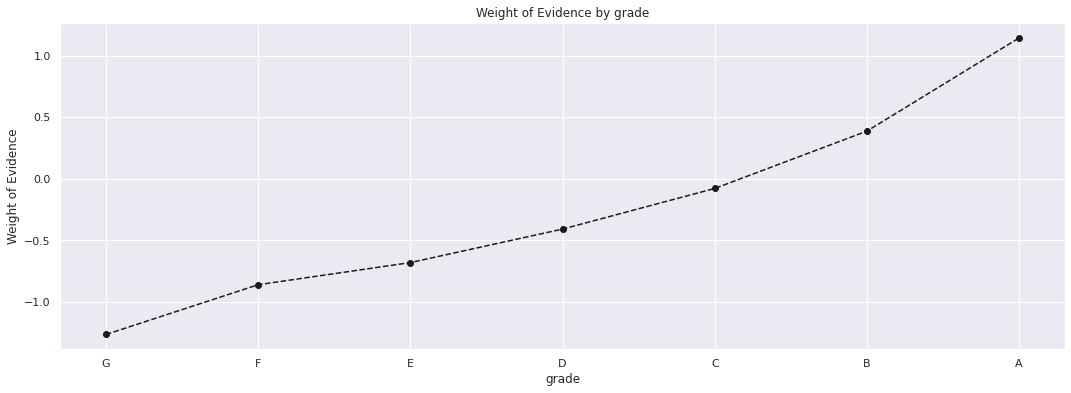

In [41]:
plot_by_woe(df_temp)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

### 6. Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [42]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
# We calculate weight of evidence.
df_temp

home_ownership  n_obs  prop_good  ...  diff_prop_good  diff_WoE        IV
0          OTHER     45   0.777778  ...             NaN       NaN  0.022938
1           NONE     10   0.800000  ...        0.022222  0.133531  0.022938
2           RENT  37874   0.874003  ...        0.074003  0.550534  0.022938
3            OWN   8409   0.888572  ...        0.014568  0.139406  0.022938
4       MORTGAGE  46919   0.904751  ...        0.016179  0.174928  0.022938

[5 rows x 12 columns]

In [43]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [44]:
# There are many categories with very few observations and many categories with very different "good" %.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# 'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.

df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

# 'RENT_OTHER_NONE_ANY' will be the reference category.

# Alternatively:
#loan_data.loc['home_ownership' in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 1
#loan_data.loc['home_ownership' not in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 0
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 1
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 0
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 1
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 0

### 7. Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [45]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [46]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


addr_state  n_obs  prop_good  ...  diff_prop_good  diff_WoE   IV
0          NE      1   0.000000  ...             NaN       NaN  inf
1          ID      2   0.500000  ...        0.500000       inf  inf
2          NV   1298   0.855932  ...        0.355932  1.781907  inf
3          HI    486   0.860082  ...        0.004150  0.034067  inf
4          FL   6426   0.870059  ...        0.009977  0.085508  inf
5          AL   1182   0.873096  ...        0.003037  0.027137  inf
6          NJ   3676   0.875408  ...        0.002312  0.021027  inf
7          LA   1130   0.876106  ...        0.000698  0.006416  inf
8          NY   8031   0.879965  ...        0.003859  0.036038  inf
9          RI    403   0.880893  ...        0.000928  0.008817  inf
10         NC   2478   0.881759  ...        0.000866  0.008282  inf
11         MI   2358   0.882103  ...        0.000344  0.003304  inf
12         DE    208   0.884615  ...        0.002512  0.024380  inf
13         MD   2203   0.884703  ...        0.000087  0.000856  inf
14         OK    833   0.885954  ...        0.001252  0.012330  inf
15         MO   1491   0.885983  ...        0.000028  0.000279  inf
16         AR    728   0.887363  ...        0.001380  0.013734  inf
17         PA   3334   0.888122  ...        0.000760  0.007624  inf
18         SD    179   0.888268  ...        0.000146  0.001468  inf
19         AZ   2067   0.888728  ...        0.000459  0.004638  inf
20         NM    513   0.888889  ...        0.000161  0.001632  inf
21         CA  14251   0.889411  ...        0.000522  0.005300  inf
22         MA   2214   0.893857  ...        0.004446  0.046020  inf
23         GA   3015   0.893864  ...        0.000007  0.000071  inf
24         IN   1315   0.894297  ...        0.000433  0.004568  inf
25         VA   2856   0.894958  ...        0.000661  0.007016  inf
26         NH    402   0.895522  ...        0.000564  0.006018  inf
27         OH   3102   0.895551  ...        0.000029  0.000309  inf
28         UT    672   0.895833  ...        0.000282  0.003019  inf
29         WI   1171   0.896670  ...        0.000836  0.008993  inf
30         MN   1632   0.897059  ...        0.000389  0.004209  inf
31         WA   2145   0.899767  ...        0.002708  0.029674  inf
32         CO   1916   0.906054  ...        0.006287  0.071745  inf
33         TX   7281   0.906057  ...        0.000003  0.000030  inf
34         SC   1135   0.906608  ...        0.000551  0.006491  inf
35         TN   1139   0.906936  ...        0.000328  0.003880  inf
36         OR   1135   0.907489  ...        0.000553  0.006570  inf
37         IL   3779   0.908706  ...        0.001217  0.014583  inf
38         KY    851   0.909518  ...        0.000812  0.009830  inf
39         CT   1429   0.909727  ...        0.000209  0.002541  inf
40         WV    486   0.917695  ...        0.007968  0.101132  inf
41         WY    209   0.918660  ...        0.000965  0.012843  inf
42         AK    248   0.919355  ...        0.000695  0.009331  inf
43         KS    830   0.920482  ...        0.001127  0.015300  inf
44         VT    178   0.921348  ...        0.000866  0.011896  inf
45         DC    297   0.922559  ...        0.001211  0.016825  inf
46         MS    246   0.922764  ...        0.000205  0.002877  inf
47         MT    293   0.928328  ...        0.005563  0.080769  inf
48         ME      2   1.000000  ...        0.071672       inf  inf
49         IA      1   1.000000  ...        0.000000       NaN  inf

[50 rows x 12 columns]

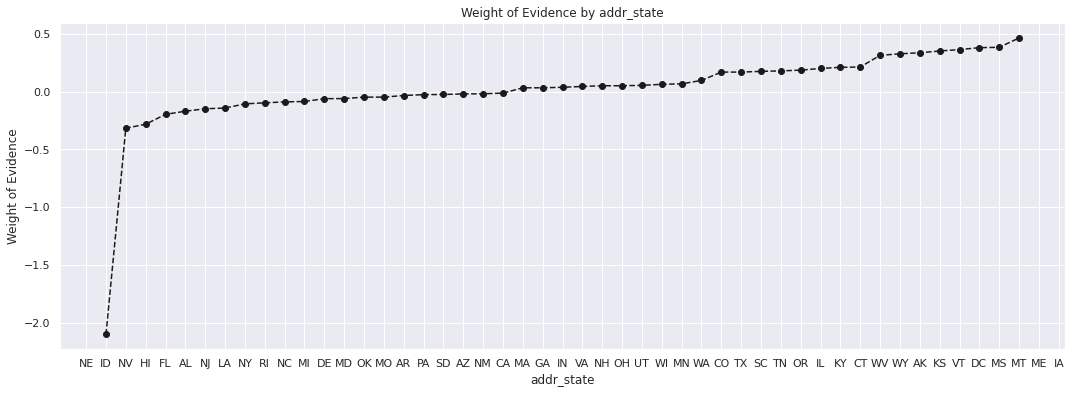

In [47]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [48]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [49]:
plot_by_woe(df_temp.iloc[2: -2, : ])
# We plot the weight of evidence values.

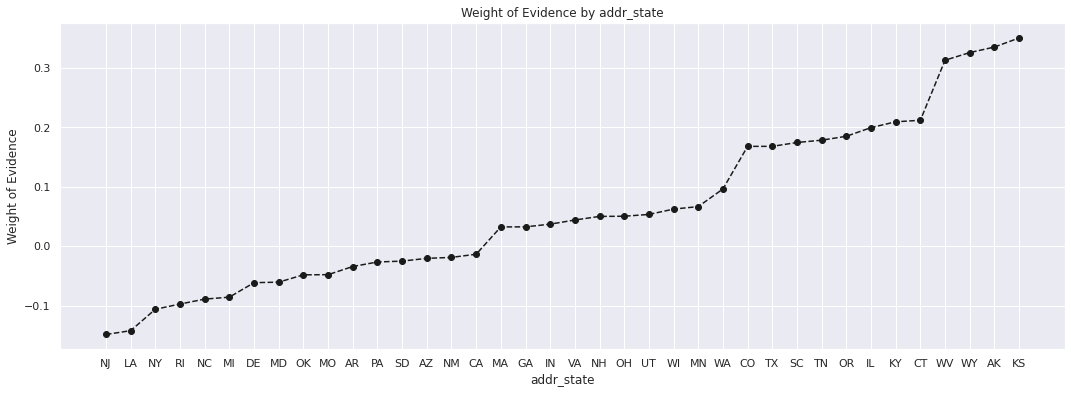

In [50]:
plot_by_woe(df_temp.iloc[6: -6, : ])
# We plot the weight of evidence values.

In [51]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### 8. Preprocessing Discrete Variables

In [52]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

verification_status  n_obs  prop_good  ...  diff_prop_good  diff_WoE        IV
0            Verified  33641   0.872031  ...             NaN       NaN  0.022684
1     Source Verified  29963   0.895738  ...        0.023707  0.231704  0.022684
2        Not Verified  29653   0.906890  ...        0.011152  0.125494  0.022684

[3 rows x 12 columns]

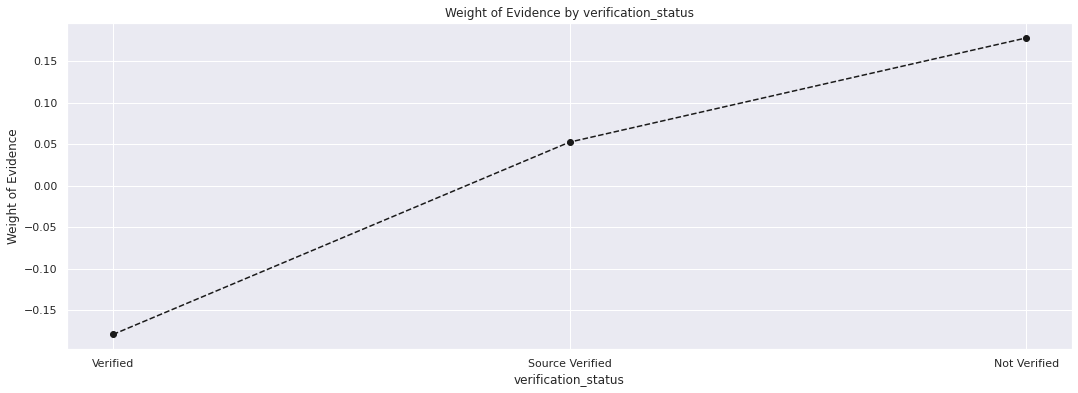

In [53]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [54]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

purpose  n_obs  prop_good  ...  diff_prop_good  diff_WoE        IV
0          educational     89   0.752809  ...             NaN       NaN  0.045124
1     renewable_energy     70   0.771429  ...        0.018620  0.102745  0.045124
2       small_business   1431   0.777079  ...        0.005650  0.032329  0.045124
3              medical    918   0.857298  ...        0.080220  0.544307  0.045124
4                house    439   0.858770  ...        0.001471  0.012080  0.045124
5                other   4806   0.861007  ...        0.002237  0.018569  0.045124
6              wedding    456   0.864035  ...        0.003028  0.025537  0.045124
7               moving    602   0.878738  ...        0.014702  0.131312  0.045124
8             vacation    496   0.881048  ...        0.002311  0.021867  0.045124
9   debt_consolidation  55012   0.885916  ...        0.004867  0.047289  0.045124
10      major_purchase   1991   0.900552  ...        0.014637  0.153693  0.045124
11    home_improvement   5299   0.906397  ...        0.005845  0.067042  0.045124
12                 car   1072   0.916045  ...        0.009647  0.119362  0.045124
13         credit_card  20576   0.916505  ...        0.000460  0.005995  0.045124

[14 rows x 12 columns]

In [55]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [56]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [57]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status  n_obs  prop_good  ...  diff_prop_good  diff_WoE        IV
0                   f  60491   0.879685  ...             NaN       NaN  0.024888
1                   w  32766   0.911127  ...        0.031443  0.338032  0.024888

[2 rows x 12 columns]

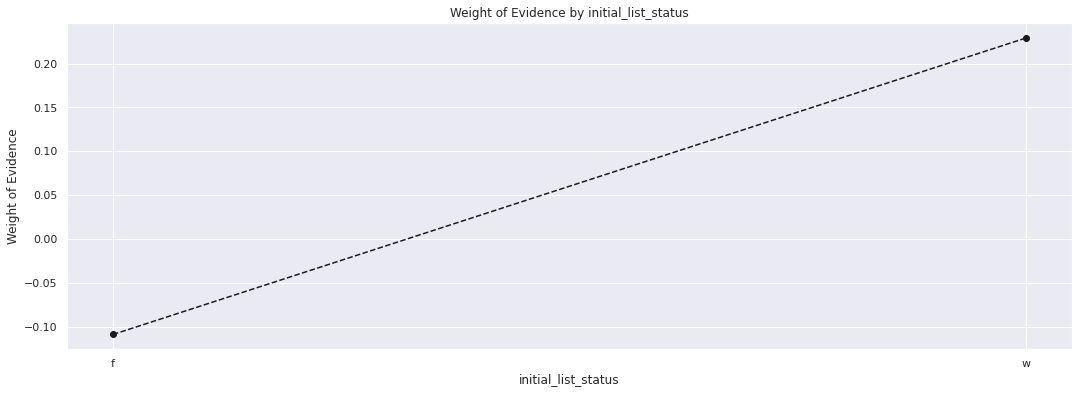

In [58]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

### 9. Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [59]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

### 10. Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [60]:
# term
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([60, 36])

In [61]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

term_int  n_obs  prop_good  ...  diff_prop_good  diff_WoE        IV
0        36  67534   0.902597  ...             NaN       NaN  0.036603
1        60  25723   0.859581  ...        0.043016  0.414608  0.036603

[2 rows x 12 columns]

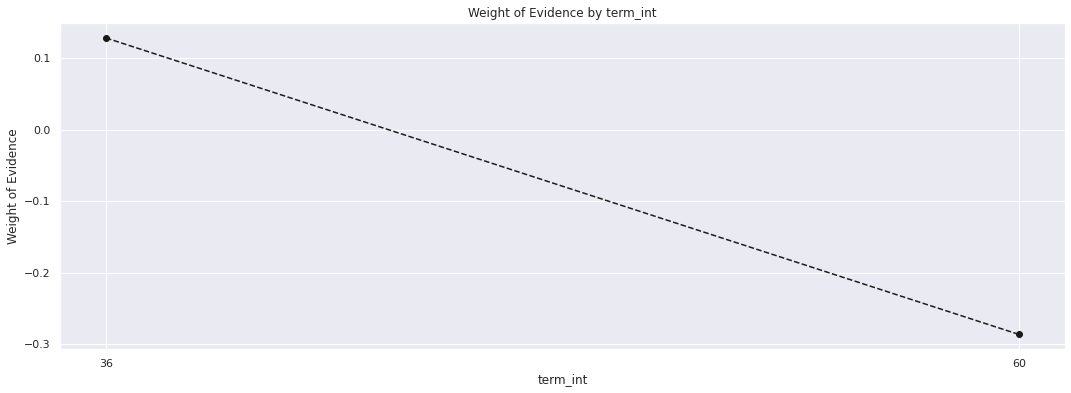

In [62]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [63]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [64]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [65]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

emp_length_int  n_obs  prop_good  ...  diff_prop_good  diff_WoE        IV
0              0.0  11553   0.874491  ...             NaN       NaN  0.007766
1              1.0   5968   0.892594  ...        0.018102  0.176245  0.007766
2              2.0   8295   0.887402  ...        0.005192  0.053039  0.007766
3              3.0   7391   0.889325  ...        0.001923  0.019389  0.007766
4              4.0   5555   0.889469  ...        0.000144  0.001465  0.007766
5              5.0   6172   0.886261  ...        0.003208  0.032228  0.007766
6              6.0   5225   0.878852  ...        0.007409  0.071500  0.007766
7              7.0   5131   0.893588  ...        0.014736  0.146326  0.007766
8              8.0   4542   0.890137  ...        0.003451  0.035790  0.007766
9              9.0   3621   0.892847  ...        0.002711  0.028024  0.007766
10            10.0  29804   0.900517  ...        0.007669  0.082819  0.007766

[11 rows x 12 columns]

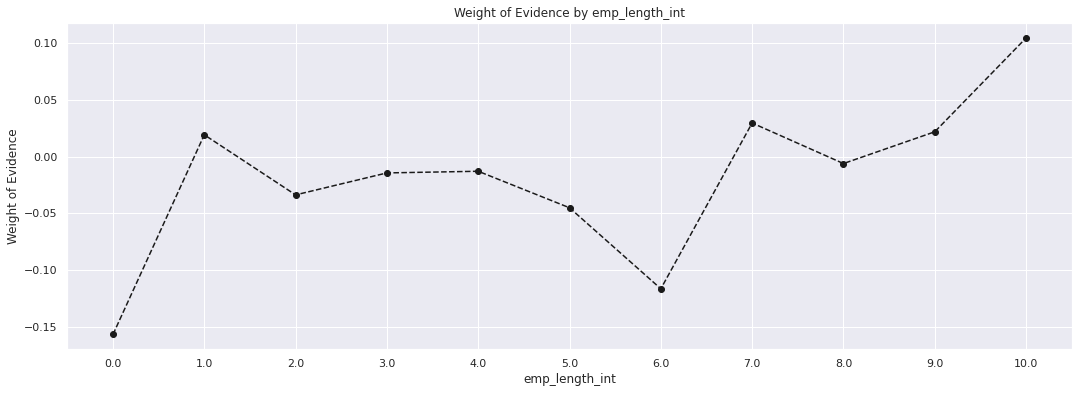

In [66]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [67]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### 11. Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [68]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [69]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [70]:
df_inputs_prepr['mths_since_issue_d_factor']

362514     (39.6, 41.4]
288564     (37.8, 39.6]
213591     (64.8, 66.6]
263083    (35.91, 37.8]
165001     (57.6, 59.4]
              ...      
115        (70.2, 72.0]
296284     (37.8, 39.6]
61777      (48.6, 50.4]
91763      (50.4, 52.2]
167512     (57.6, 59.4]
Name: mths_since_issue_d_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] < ... <
                                     (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] <
                                     (124.2, 126.0]]

In [71]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

mths_since_issue_d_factor  n_obs  ...  diff_WoE        IV
0              (35.91, 37.8]   7191  ...       NaN  0.126297
1               (37.8, 39.6]   9752  ...  0.266241  0.126297
2               (39.6, 41.4]   9506  ...  0.150833  0.126297
3               (41.4, 43.2]   7240  ...  0.138715  0.126297
4               (43.2, 45.0]   7217  ...  0.073381  0.126297
5               (45.0, 46.8]   3104  ...  0.083487  0.126297
6               (46.8, 48.6]   6197  ...  0.052525  0.126297
7               (48.6, 50.4]   5821  ...  0.043669  0.126297
8               (50.4, 52.2]   5021  ...  0.067693  0.126297
9               (52.2, 54.0]   4497  ...  0.044080  0.126297
10              (54.0, 55.8]   2064  ...  0.069603  0.126297
11              (55.8, 57.6]   3572  ...  0.041299  0.126297
12              (57.6, 59.4]   2904  ...  0.085512  0.126297
13              (59.4, 61.2]   2474  ...  0.025623  0.126297
14              (61.2, 63.0]   2539  ...  0.033644  0.126297
15              (63.0, 64.8]   1115  ...  0.108683  0.126297
16              (64.8, 66.6]   1721  ...  0.145048  0.126297
17              (66.6, 68.4]   1296  ...  0.259396  0.126297
18              (68.4, 70.2]   1097  ...  0.100351  0.126297
19              (70.2, 72.0]   1001  ...  0.164273  0.126297
20              (72.0, 73.8]    447  ...  0.094765  0.126297
21              (73.8, 75.6]    790  ...  0.174171  0.126297
22              (75.6, 77.4]    754  ...  0.118297  0.126297
23              (77.4, 79.2]    690  ...  0.182579  0.126297
24              (79.2, 81.0]    599  ...  0.263975  0.126297
25              (81.0, 82.8]    254  ...  0.057678  0.126297
26              (82.8, 84.6]    533  ...  0.072426  0.126297
27              (84.6, 86.4]    459  ...  0.340927  0.126297
28              (86.4, 88.2]    443  ...  0.220536  0.126297
29              (88.2, 90.0]    439  ...  0.010499  0.126297
30              (90.0, 91.8]    194  ...  0.221331  0.126297
31              (91.8, 93.6]    367  ...  0.536611  0.126297
32              (93.6, 95.4]    257  ...  0.171924  0.126297
33              (95.4, 97.2]    276  ...  0.350793  0.126297
34              (97.2, 99.0]    234  ...  0.056777  0.126297
35             (99.0, 100.8]    100  ...  0.863368  0.126297
36            (100.8, 102.6]    170  ...  0.818724  0.126297
37            (102.6, 104.4]    150  ...  0.307136  0.126297
38            (104.4, 106.2]    129  ...  0.045473  0.126297
39            (106.2, 108.0]    119  ...  0.401617  0.126297
40            (108.0, 109.8]     36  ...  0.340881  0.126297
41            (109.8, 111.6]     40  ...  0.438255  0.126297
42            (111.6, 113.4]     37  ...  2.197225  0.126297
43            (113.4, 115.2]     57  ...  2.035956  0.126297
44            (115.2, 117.0]    131  ...  0.151699  0.126297
45            (117.0, 118.8]     59  ...  0.077442  0.126297
46            (118.8, 120.6]     83  ...  0.453474  0.126297
47            (120.6, 122.4]     41  ...  0.573544  0.126297
48            (122.4, 124.2]     23  ...  0.380391  0.126297
49            (124.2, 126.0]     17  ...  1.188224  0.126297

[50 rows x 12 columns]

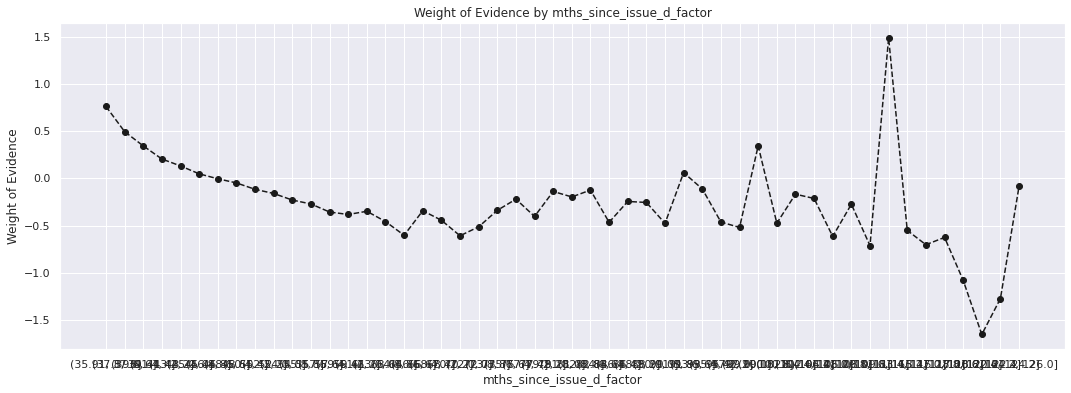

In [72]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

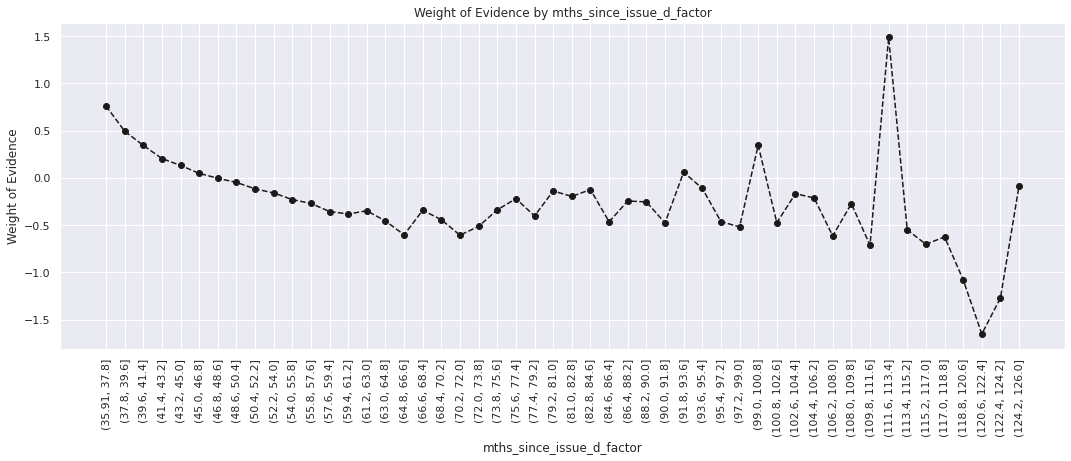

In [73]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values, rotating the labels 90 degrees.

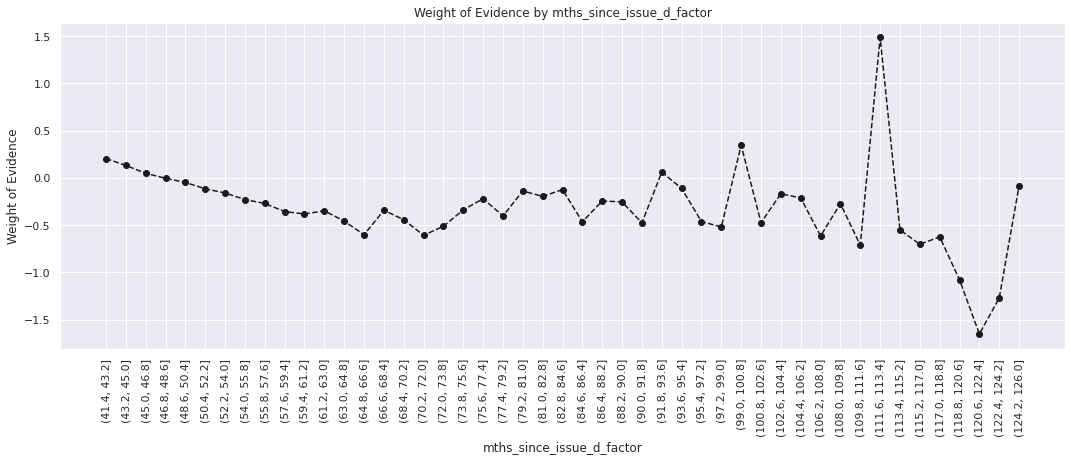

In [74]:
plot_by_woe(df_temp.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [75]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [76]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [77]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

int_rate_factor  n_obs  prop_good  ...  diff_prop_good  diff_WoE        IV
0     (5.399, 5.833]    198   0.969697  ...             NaN       NaN  0.371465
1     (5.833, 6.246]   2086   0.979866  ...        0.010169  0.419258  0.371465
2     (6.246, 6.658]   1974   0.972138  ...        0.007728  0.332768  0.371465
3     (6.658, 7.071]    477   0.951782  ...        0.020356  0.569623  0.371465
4     (7.071, 7.484]    804   0.981343  ...        0.029561  0.980113  0.371465
5     (7.484, 7.897]   3245   0.965485  ...        0.015858  0.631469  0.371465
6      (7.897, 8.31]   2429   0.951009  ...        0.014477  0.365368  0.371465
7      (8.31, 8.722]   1680   0.965476  ...        0.014468  0.365093  0.371465
8     (8.722, 9.135]   2384   0.942114  ...        0.023362  0.541320  0.371465
9     (9.135, 9.548]   1590   0.976730  ...        0.034615  0.947373  0.371465
10    (9.548, 9.961]   1881   0.931419  ...        0.045310  1.128325  0.371465
11   (9.961, 10.374]   2766   0.936370  ...        0.004951  0.080228  0.371465
12  (10.374, 10.786]   1390   0.917986  ...        0.018385  0.273642  0.371465
13  (10.786, 11.199]   4464   0.937500  ...        0.019514  0.292763  0.371465
14  (11.199, 11.612]   1213   0.916735  ...        0.020765  0.309255  0.371465
15  (11.612, 12.025]   3737   0.931496  ...        0.014760  0.211102  0.371465
16  (12.025, 12.438]   3077   0.905752  ...        0.025743  0.347057  0.371465
17   (12.438, 12.85]   2754   0.920116  ...        0.014364  0.181087  0.371465
18   (12.85, 13.263]   5440   0.904044  ...        0.016072  0.200937  0.371465
19  (13.263, 13.676]   3806   0.897793  ...        0.006251  0.070051  0.371465
20  (13.676, 14.089]   2692   0.894874  ...        0.002919  0.031419  0.371465
21  (14.089, 14.502]   5760   0.887153  ...        0.007721  0.079538  0.371465
22  (14.502, 14.914]   1187   0.867734  ...        0.019419  0.180914  0.371465
23  (14.914, 15.327]   4811   0.882145  ...        0.014411  0.131834  0.371465
24   (15.327, 15.74]   3146   0.886840  ...        0.004695  0.045964  0.371465
25   (15.74, 16.153]   1869   0.837346  ...        0.049494  0.420253  0.371465
26  (16.153, 16.566]   3230   0.849226  ...        0.011880  0.089930  0.371465
27  (16.566, 16.978]   1035   0.852174  ...        0.002948  0.023211  0.371465
28  (16.978, 17.391]   2843   0.848048  ...        0.004126  0.032383  0.371465
29  (17.391, 17.804]   2992   0.837567  ...        0.010481  0.079137  0.371465
30  (17.804, 18.217]    286   0.835664  ...        0.001903  0.013919  0.371465
31   (18.217, 18.63]   2729   0.827409  ...        0.008255  0.058939  0.371465
32   (18.63, 19.042]   1835   0.820163  ...        0.007246  0.049921  0.371465
33  (19.042, 19.455]   1135   0.786784  ...        0.033379  0.211807  0.371465
34  (19.455, 19.868]   1680   0.816667  ...        0.029883  0.188276  0.371465
35  (19.868, 20.281]   1244   0.849678  ...        0.033012  0.238156  0.371465
36  (20.281, 20.694]    805   0.814907  ...        0.034772  0.249867  0.371465
37  (20.694, 21.106]    956   0.791841  ...        0.023066  0.146156  0.371465
38  (21.106, 21.519]    701   0.757489  ...        0.034352  0.197095  0.371465
39  (21.519, 21.932]    222   0.801802  ...        0.044313  0.258630  0.371465
40  (21.932, 22.345]    832   0.775240  ...        0.026561  0.159452  0.371465
41  (22.345, 22.758]    586   0.737201  ...        0.038039  0.206669  0.371465
42   (22.758, 23.17]    375   0.741333  ...        0.004132  0.021437  0.371465
43   (23.17, 23.583]    655   0.778626  ...        0.037293  0.204767  0.371465
44  (23.583, 23.996]    408   0.750000  ...        0.028626  0.159065  0.371465
45  (23.996, 24.409]    393   0.834606  ...        0.084606  0.520014  0.371465
46  (24.409, 24.822]    436   0.786697  ...        0.047908  0.313495  0.371465
47  (24.822, 25.234]    351   0.792023  ...        0.005326  0.032031  0.371465
48  (25.234, 25.647]    194   0.757732  ...        0.034291  0.196877  0.371465
49   

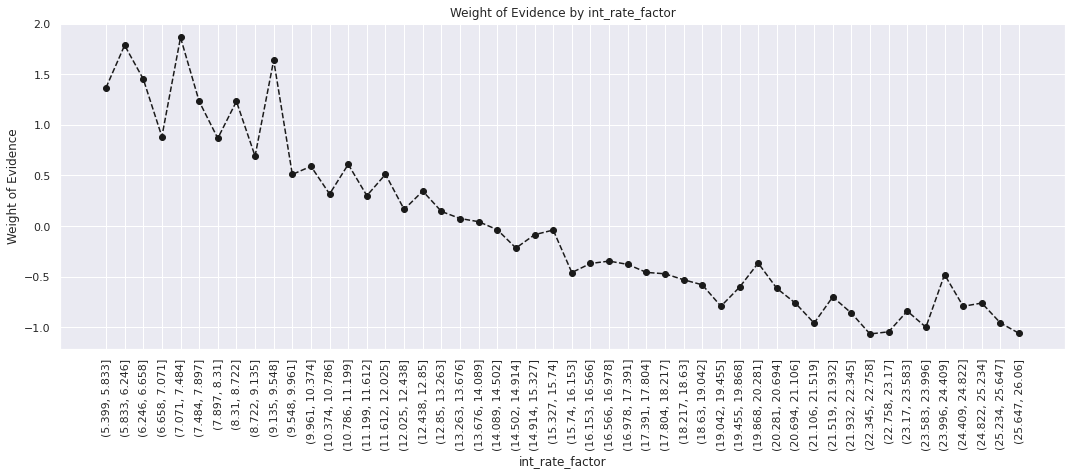

In [78]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [79]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [80]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

funded_amnt_factor  n_obs  prop_good  ...  diff_prop_good  diff_WoE        IV
0      (465.5, 1190.0]    319   0.880878  ...             NaN       NaN  0.018663
1     (1190.0, 1880.0]    800   0.896250  ...        0.015372  0.155467  0.018663
2     (1880.0, 2570.0]   1513   0.900198  ...        0.003948  0.043194  0.018663
3     (2570.0, 3260.0]   1817   0.893781  ...        0.006417  0.069472  0.018663
4     (3260.0, 3950.0]   1245   0.891566  ...        0.002215  0.023117  0.018663
5     (3950.0, 4640.0]   2298   0.882942  ...        0.008625  0.086254  0.018663
6     (4640.0, 5330.0]   3957   0.898155  ...        0.015213  0.156305  0.018663
7     (5330.0, 6020.0]   4186   0.906593  ...        0.008438  0.095840  0.018663
8     (6020.0, 6710.0]   1718   0.881839  ...        0.024754  0.262767  0.018663
9     (6710.0, 7400.0]   2880   0.893403  ...        0.011563  0.116015  0.018663
10    (7400.0, 8090.0]   4266   0.895218  ...        0.001815  0.019205  0.018663
11    (8090.0, 8780.0]   1617   0.890538  ...        0.004680  0.048937  0.018663
12    (8780.0, 9470.0]   2320   0.888793  ...        0.001745  0.017777  0.018663
13   (9470.0, 10160.0]   8552   0.891955  ...        0.003162  0.032397  0.018663
14  (10160.0, 10850.0]   1642   0.872716  ...        0.019239  0.185678  0.018663
15  (10850.0, 11540.0]   2091   0.880918  ...        0.008202  0.075963  0.018663
16  (11540.0, 12230.0]   5767   0.906190  ...        0.025272  0.266828  0.018663
17  (12230.0, 12920.0]   1228   0.875407  ...        0.030783  0.318344  0.018663
18  (12920.0, 13610.0]   1860   0.898925  ...        0.023518  0.235696  0.018663
19  (13610.0, 14300.0]   2087   0.899377  ...        0.000452  0.004989  0.018663
20  (14300.0, 14990.0]   1255   0.886853  ...        0.012525  0.131335  0.018663
21  (14990.0, 15680.0]   5441   0.903143  ...        0.016290  0.173656  0.018663
22  (15680.0, 16370.0]   2920   0.882534  ...        0.020609  0.215992  0.018663
23  (16370.0, 17060.0]   1625   0.880000  ...        0.002534  0.024221  0.018663
24  (17060.0, 17750.0]    921   0.850163  ...        0.029837  0.256551  0.018663
25  (17750.0, 18440.0]   2898   0.885783  ...        0.035620  0.312496  0.018663
26  (18440.0, 19130.0]    989   0.858443  ...        0.027340  0.245958  0.018663
27  (19130.0, 19820.0]   1057   0.875118  ...        0.016675  0.144575  0.018663
28  (19820.0, 20510.0]   5055   0.896736  ...        0.021618  0.214480  0.018663
29  (20510.0, 21200.0]   1635   0.895413  ...        0.001323  0.014208  0.018663
30  (21200.0, 21890.0]    476   0.834034  ...        0.061379  0.532776  0.018663
31  (21890.0, 22580.0]   1028   0.883268  ...        0.049235  0.409264  0.018663
32  (22580.0, 23270.0]    633   0.892575  ...        0.009307  0.093565  0.018663
33  (23270.0, 23960.0]    497   0.837022  ...        0.055553  0.481082  0.018663
34  (23960.0, 24650.0]   2491   0.898033  ...        0.061011  0.539321  0.018663
35  (24650.0, 25340.0]   2500   0.903200  ...        0.005167  0.057740  0.018663
36  (25340.0, 26030.0]    487   0.852156  ...        0.051044  0.481685  0.018663
37  (26030.0, 26720.0]    299   0.822742  ...        0.029414  0.216573  0.018663
38  (26720.0, 27410.0]    410   0.870732  ...        0.047989  0.372404  0.018663
39  (27410.0, 28100.0]   1604   0.895885  ...        0.025154  0.244875  0.018663
40  (28100.0, 28790.0]    204   0.857843  ...        0.038042  0.354829  0.018663
41  (28790.0, 29480.0]    286   0.846154  ...        0.011689  0.092742  0.018663
42  (29480.0, 30170.0]   1762   0.879682  ...        0.033528  0.284676  0.018663
43  (30170.0, 30860.0]    133   0.827068  ...        0.052615  0.424438  0.018663
44  (30860.0, 31550.0]    218   0.830275  ...        0.003208  0.022593  0.018663
45  (31550.0, 32240.0]    367   0.920981  ...        0.090706  0.868171  0.018663
46  (32240.0, 32930.0]    139   0.884892  ...        0.036089  0.416154  0.018663
47  (32930.0, 33620.0]    275   0.901818  ...        0.016926  0.177

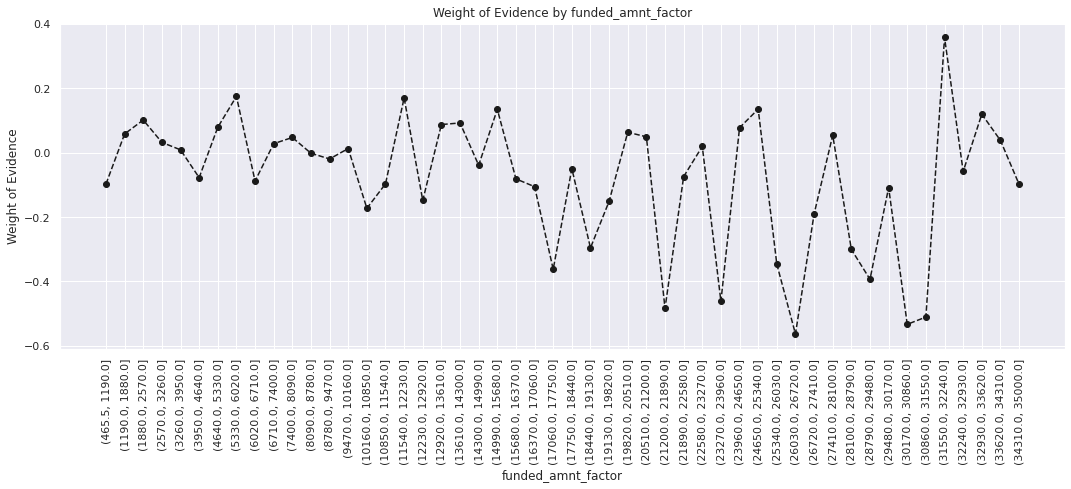

In [81]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [82]:
### Data Preparation: Continuous Variables, Part 1 and 2: Homework

### 12. Data Preparation: Continuous Variables, Part 1 and 2

In [83]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

mths_since_earliest_cr_line_factor  n_obs  ...  diff_WoE   IV
0                     (-0.587, 11.74]      5  ...       NaN  inf
1                      (11.74, 23.48]      0  ...       NaN  inf
2                      (23.48, 35.22]      0  ...       NaN  inf
3                      (35.22, 46.96]      0  ...       NaN  inf
4                       (46.96, 58.7]      0  ...       NaN  inf
5                       (58.7, 70.44]      0  ...       NaN  inf
6                      (70.44, 82.18]    182  ...       NaN  inf
7                      (82.18, 93.92]    508  ...  0.129212  inf
8                     (93.92, 105.66]    715  ...  0.607316  inf
9                     (105.66, 117.4]   1268  ...  0.025098  inf
10                    (117.4, 129.14]   2314  ...  0.173421  inf
11                   (129.14, 140.88]   2816  ...  0.124986  inf
12                   (140.88, 152.62]   3366  ...  0.192991  inf
13                   (152.62, 164.36]   3989  ...  0.032507  inf
14                    (164.36, 176.1]   4857  ...  0.012721  inf
15                    (176.1, 187.84]   5076  ...  0.045507  inf
16                   (187.84, 199.58]   6578  ...  0.092371  inf
17                   (199.58, 211.32]   7131  ...  0.051118  inf
18                   (211.32, 223.06]   6775  ...  0.032222  inf
19                    (223.06, 234.8]   5521  ...  0.057302  inf
20                    (234.8, 246.54]   4966  ...  0.056523  inf
21                   (246.54, 258.28]   4549  ...  0.069959  inf
22                   (258.28, 270.02]   4472  ...  0.003744  inf
23                   (270.02, 281.76]   3672  ...  0.055373  inf
24                    (281.76, 293.5]   3640  ...  0.038263  inf
25                    (293.5, 305.24]   2602  ...  0.028075  inf
26                   (305.24, 316.98]   1988  ...  0.066508  inf
27                   (316.98, 328.72]   2020  ...  0.086589  inf
28                   (328.72, 340.46]   2129  ...  0.004178  inf
29                    (340.46, 352.2]   1810  ...  0.021351  inf
30                    (352.2, 363.94]   1477  ...  0.172572  inf
31                   (363.94, 375.68]   1360  ...  0.046441  inf
32                   (375.68, 387.42]   1152  ...  0.058723  inf
33                   (387.42, 399.16]   1051  ...  0.016139  inf
34                    (399.16, 410.9]    826  ...  0.136528  inf
35                    (410.9, 422.64]    808  ...  0.111883  inf
36                   (422.64, 434.38]    524  ...  0.379789  inf
37                   (434.38, 446.12]    416  ...  0.275791  inf
38                   (446.12, 457.86]    329  ...  0.004470  inf
39                    (457.86, 469.6]    376  ...  0.030651  inf
40                    (469.6, 481.34]    371  ...  0.050283  inf
41                   (481.34, 493.08]    294  ...  0.103547  inf
42                   (493.08, 504.82]    229  ...  0.518917  inf
43                   (504.82, 516.56]    178  ...  0.424629  inf
44                    (516.56, 528.3]    159  ...  0.119826  inf
45                    (528.3, 540.04]    140  ...  0.226288  inf
46                   (540.04, 551.78]    135  ...  0.040166  inf
47                   (551.78, 563.52]     93  ...  0.124138  inf
48                   (563.52, 575.26]     80  ...  0.526998  inf
49                    (575.26, 587.0]    310  ...  0.044928  inf

[50 rows x 12 columns]

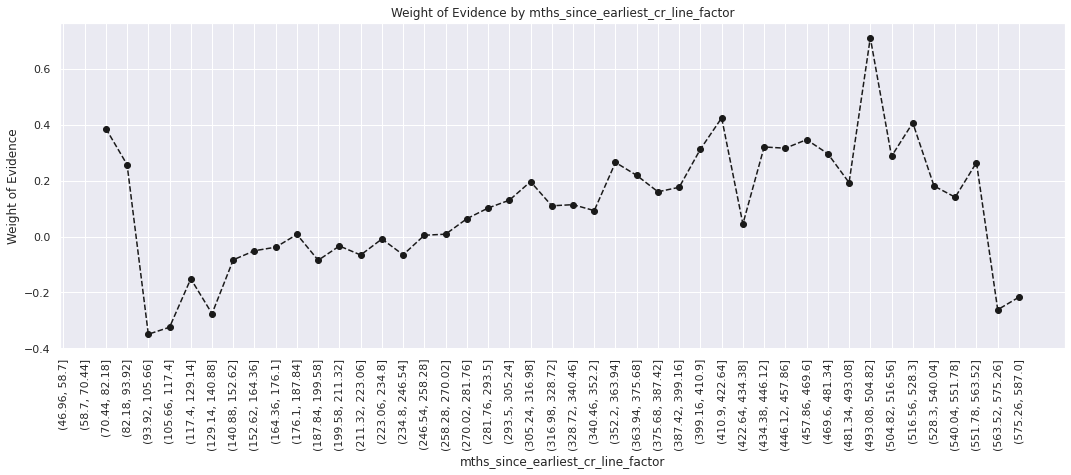

In [84]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

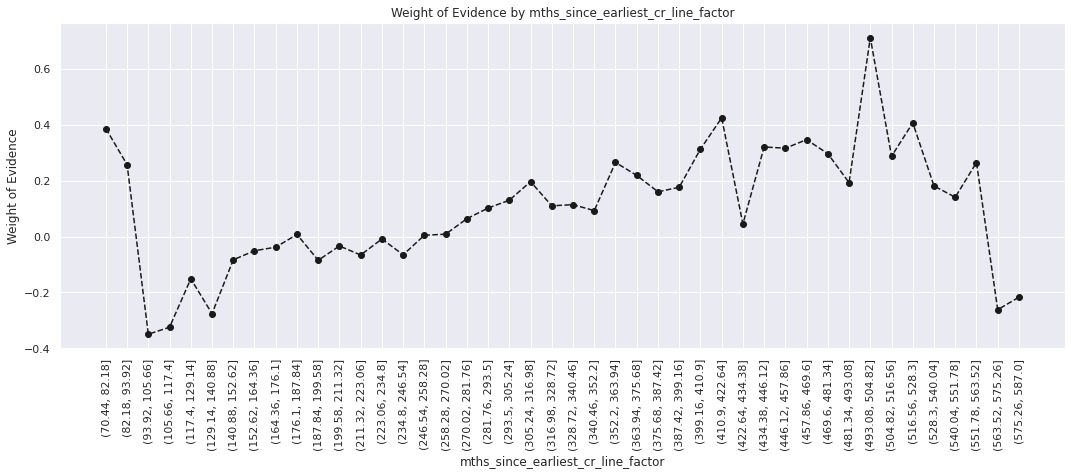

In [85]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [86]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [87]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


delinq_2yrs  n_obs  prop_good  ...  diff_prop_good  diff_WoE   IV
0           0.0  76566   0.890944  ...             NaN       NaN  inf
1           1.0  11297   0.890413  ...        0.000530  0.005447  inf
2           2.0   3192   0.885025  ...        0.005388  0.054069  inf
3           3.0   1134   0.893298  ...        0.008273  0.083979  inf
4           4.0    510   0.886275  ...        0.007024  0.071642  inf
5           5.0    270   0.911111  ...        0.024837  0.274039  inf
6           6.0    128   0.859375  ...        0.051736  0.517169  inf
7           7.0     67   0.925373  ...        0.065998  0.707588  inf
8           8.0     29   0.896552  ...        0.028821  0.358212  inf
9           9.0     22   0.954545  ...        0.057994  0.885038  inf
10         10.0      9   0.888889  ...        0.065657  0.965081  inf
11         11.0     10   1.000000  ...        0.111111       inf  inf
12         12.0      8   0.625000  ...        0.375000       inf  inf
13         13.0      7   0.857143  ...        0.232143  1.280934  inf
14         14.0      2   1.000000  ...        0.142857       inf  inf
15         15.0      1   1.000000  ...        0.000000       NaN  inf
16         16.0      1   1.000000  ...        0.000000       NaN  inf
17         18.0      3   1.000000  ...        0.000000       NaN  inf
18         19.0      1   1.000000  ...        0.000000       NaN  inf

[19 rows x 12 columns]

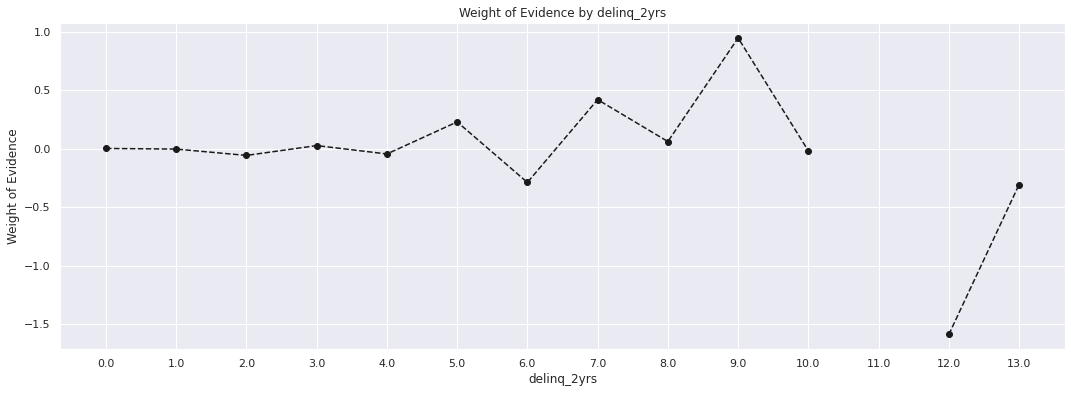

In [88]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [89]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [90]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


inq_last_6mths  n_obs  prop_good  ...  diff_prop_good  diff_WoE   IV
0              0.0  48295   0.910094  ...             NaN       NaN  inf
1              1.0  25985   0.882394  ...        0.027701  0.299490  inf
2              2.0  11611   0.861252  ...        0.021141  0.189566  inf
3              3.0   5086   0.846245  ...        0.015008  0.120285  inf
4              4.0   1431   0.841370  ...        0.004875  0.036991  inf
5              5.0    551   0.842105  ...        0.000736  0.005522  inf
6              6.0    211   0.763033  ...        0.079072  0.504595  inf
7              7.0     36   0.527778  ...        0.235255  1.058156  inf
8              8.0     21   0.523810  ...        0.003968  0.015915  inf
9              9.0      7   0.428571  ...        0.095238  0.382992  inf
10            10.0      7   0.857143  ...        0.428571  2.079442  inf
11            11.0      7   1.000000  ...        0.142857       inf  inf
12            12.0      3   1.000000  ...        0.000000       NaN  inf
13            13.0      1   0.000000  ...        1.000000       inf  inf
14            14.0      1   0.000000  ...        0.000000       NaN  inf
15            18.0      2   0.500000  ...        0.500000       inf  inf
16            19.0      1   1.000000  ...        0.500000       inf  inf
17            24.0      1   1.000000  ...        0.000000       NaN  inf

[18 rows x 12 columns]

In [91]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [92]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [93]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


open_acc  n_obs  prop_good  ...  diff_prop_good  diff_WoE   IV
0        0.0      7   1.000000  ...             NaN       NaN  inf
1        1.0     32   0.875000  ...        0.125000       inf  inf
2        2.0    334   0.838323  ...        0.036677  0.300105  inf
3        3.0   1122   0.852941  ...        0.014618  0.112052  inf
4        4.0   2560   0.892188  ...        0.039246  0.355425  inf
5        5.0   4403   0.891438  ...        0.000750  0.007772  inf
6        6.0   6216   0.890766  ...        0.000672  0.006924  inf
7        7.0   7433   0.886856  ...        0.003910  0.039567  inf
8        8.0   8314   0.893433  ...        0.006577  0.067275  inf
9        9.0   8768   0.888230  ...        0.005203  0.053508  inf
10      10.0   8576   0.889109  ...        0.000879  0.008887  inf
11      11.0   7740   0.894444  ...        0.005335  0.055292  inf
12      12.0   6886   0.887017  ...        0.007427  0.076337  inf
13      13.0   5914   0.893304  ...        0.006287  0.064315  inf
14      14.0   4960   0.895766  ...        0.002462  0.026099  inf
15      15.0   4006   0.892162  ...        0.003604  0.038027  inf
16      16.0   3269   0.898134  ...        0.005972  0.063646  inf
17      17.0   2680   0.886940  ...        0.011194  0.116799  inf
18      18.0   2259   0.902169  ...        0.015229  0.161700  inf
19      19.0   1811   0.893429  ...        0.008740  0.095306  inf
20      20.0   1444   0.898199  ...        0.004770  0.051121  inf
21      21.0   1037   0.880424  ...        0.017775  0.180922  inf
22      22.0    784   0.887755  ...        0.007331  0.071559  inf
23      23.0    628   0.904459  ...        0.016703  0.179764  inf
24      24.0    473   0.890063  ...        0.014395  0.156388  inf
25      25.0    391   0.882353  ...        0.007710  0.076486  inf
26      26.0    250   0.884000  ...        0.001647  0.015964  inf
27      27.0    204   0.911765  ...        0.027765  0.304508  inf
28      28.0    153   0.895425  ...        0.016340  0.187983  inf
29      29.0    128   0.843750  ...        0.051675  0.460993  inf
30      30.0    107   0.906542  ...        0.062792  0.585727  inf
31      31.0     73   0.890411  ...        0.016131  0.177180  inf
32      32.0     62   0.951613  ...        0.061202  0.883979  inf
33      33.0     47   0.851064  ...        0.100549  1.235956  inf
34      34.0     40   0.825000  ...        0.026064  0.192372  inf
35      35.0     33   0.939394  ...        0.114394  1.190243  inf
36      36.0     22   0.772727  ...        0.166667  1.517065  inf
37      37.0     21   0.857143  ...        0.084416  0.567984  inf
38      38.0     14   0.928571  ...        0.071429  0.773190  inf
39      39.0     12   0.916667  ...        0.011905  0.167054  inf
40      40.0      9   0.555556  ...        0.361111  2.174752  inf
41      41.0      6   1.000000  ...        0.444444       inf  inf
42      42.0      7   1.000000  ...        0.000000       NaN  inf
43      43.0      4   1.000000  ...        0.000000       NaN  inf
44      45.0      4   1.000000  ...        0.000000       NaN  inf
45      46.0      2   1.000000  ...        0.000000       NaN  inf
46      48.0      2   1.000000  ...        0.000000       NaN  inf
47      49.0      2   1.000000  ...        0.000000       NaN  inf
48      50.0      1   1.000000  ...        0.000000       NaN  inf
49      52.0      1   1.000000  ...        0.000000       NaN  inf
50      53.0      2   1.000000  ...        0.000000       NaN  inf
51      58.0      3   1.000000  ...        0.000000       NaN  inf
52      61.0      1   1.000000  ...        0.000000       NaN  inf

[53 rows x 12 columns]

In [94]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [95]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [96]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [97]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


pub_rec  n_obs  prop_good  ...  diff_prop_good  diff_WoE   IV
0       0.0  80923   0.889179  ...             NaN       NaN  inf
1       1.0  10670   0.901125  ...        0.011946  0.127405  inf
2       2.0   1097   0.904284  ...        0.003160  0.035979  inf
3       3.0    331   0.900302  ...        0.003982  0.045177  inf
4       4.0    112   0.857143  ...        0.043159  0.408826  inf
5       5.0     73   0.904110  ...        0.046967  0.451985  inf
6       6.0     19   0.894737  ...        0.009373  0.103678  inf
7       7.0     14   0.785714  ...        0.109023  0.840783  inf
8       8.0      5   0.800000  ...        0.014286  0.087011  inf
9       9.0      2   1.000000  ...        0.200000       inf  inf
10     10.0      3   1.000000  ...        0.000000       NaN  inf
11     11.0      5   1.000000  ...        0.000000       NaN  inf
12     12.0      1   1.000000  ...        0.000000       NaN  inf
13     14.0      1   1.000000  ...        0.000000       NaN  inf
14     49.0      1   1.000000  ...        0.000000       NaN  inf

[15 rows x 12 columns]

In [98]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [99]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [100]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_acc_factor  n_obs  prop_good  ...  diff_prop_good  diff_WoE   IV
0     (-0.156, 3.12]    125   0.776000  ...             NaN       NaN  inf
1       (3.12, 6.24]   1499   0.850567  ...        0.074567  0.496549  inf
2       (6.24, 9.36]   3715   0.871871  ...        0.021304  0.178547  inf
3      (9.36, 12.48]   6288   0.874841  ...        0.002970  0.026855  inf
4      (12.48, 15.6]   8289   0.888286  ...        0.013445  0.128892  inf
5      (15.6, 18.72]   9843   0.890176  ...        0.001890  0.019189  inf
6     (18.72, 21.84]  10270   0.893866  ...        0.003690  0.038312  inf
7     (21.84, 24.96]   9971   0.892789  ...        0.001077  0.011297  inf
8     (24.96, 28.08]  11873   0.892108  ...        0.000681  0.007094  inf
9      (28.08, 31.2]   7289   0.892715  ...        0.000607  0.006321  inf
10     (31.2, 34.32]   6151   0.902617  ...        0.009902  0.107873  inf
11    (34.32, 37.44]   4745   0.905796  ...        0.003178  0.036695  inf
12    (37.44, 40.56]   3615   0.897372  ...        0.008424  0.094986  inf
13    (40.56, 43.68]   2883   0.890045  ...        0.007327  0.077159  inf
14     (43.68, 46.8]   1938   0.891641  ...        0.001596  0.016411  inf
15     (46.8, 49.92]   1478   0.905954  ...        0.014313  0.157592  inf
16    (49.92, 53.04]   1309   0.902215  ...        0.003739  0.043118  inf
17    (53.04, 56.16]    640   0.893750  ...        0.008465  0.092455  inf
18    (56.16, 59.28]    428   0.873832  ...        0.019918  0.194360  inf
19     (59.28, 62.4]    386   0.878238  ...        0.004407  0.040581  inf
20     (62.4, 65.52]    322   0.844720  ...        0.033518  0.282073  inf
21    (65.52, 68.64]     57   0.947368  ...        0.102648  1.196593  inf
22    (68.64, 71.76]     43   0.906977  ...        0.040392  0.613104  inf
23    (71.76, 74.88]     24   1.000000  ...        0.093023       inf  inf
24     (74.88, 78.0]     26   0.923077  ...        0.076923       inf  inf
25     (78.0, 81.12]     13   0.769231  ...        0.153846  1.280934  inf
26    (81.12, 84.24]     11   0.909091  ...        0.139860  1.098612  inf
27    (84.24, 87.36]      8   0.875000  ...        0.034091  0.356675  inf
28    (87.36, 90.48]      6   0.833333  ...        0.041667  0.336472  inf
29     (90.48, 93.6]      7   0.857143  ...        0.023810  0.182322  inf
30     (93.6, 96.72]      1   1.000000  ...        0.142857       inf  inf
31    (96.72, 99.84]      3   1.000000  ...        0.000000       NaN  inf
32   (99.84, 102.96]      0        NaN  ...             NaN       NaN  inf
33  (102.96, 106.08]      0        NaN  ...             NaN       NaN  inf
34   (106.08, 109.2]      0        NaN  ...             NaN       NaN  inf
35   (109.2, 112.32]      0        NaN  ...             NaN       NaN  inf
36  (112.32, 115.44]      0        NaN  ...             NaN       NaN  inf
37  (115.44, 118.56]      0        NaN  ...             NaN       NaN  inf
38  (118.56, 121.68]      0        NaN  ...             NaN       NaN  inf
39   (121.68, 124.8]      0        NaN  ...             NaN       NaN  inf
40   (124.8, 127.92]      0        NaN  ...             NaN       NaN  inf
41  (127.92, 131.04]      0        NaN  ...             NaN       NaN  inf
42  (131.04, 134.16]      0        NaN  ...             NaN       NaN  inf
43  (134.16, 137.28]      0        NaN  ...             NaN       NaN  inf
44   (137.28, 140.4]      0        NaN  ...             NaN       NaN  inf
45   (140.4, 143.52]      0        NaN  ...             NaN       NaN  inf
46  (143.52, 146.64]      0        NaN  ...             NaN       NaN  inf
47  (146.64, 149.76]      0        NaN  ...             NaN       NaN  inf
48  (149.76, 152.88]      0        NaN  ...             NaN       NaN  inf
49   (152.88, 156.0]      1   1.000000  ...             NaN       NaN  inf

[50 rows x 12 columns]

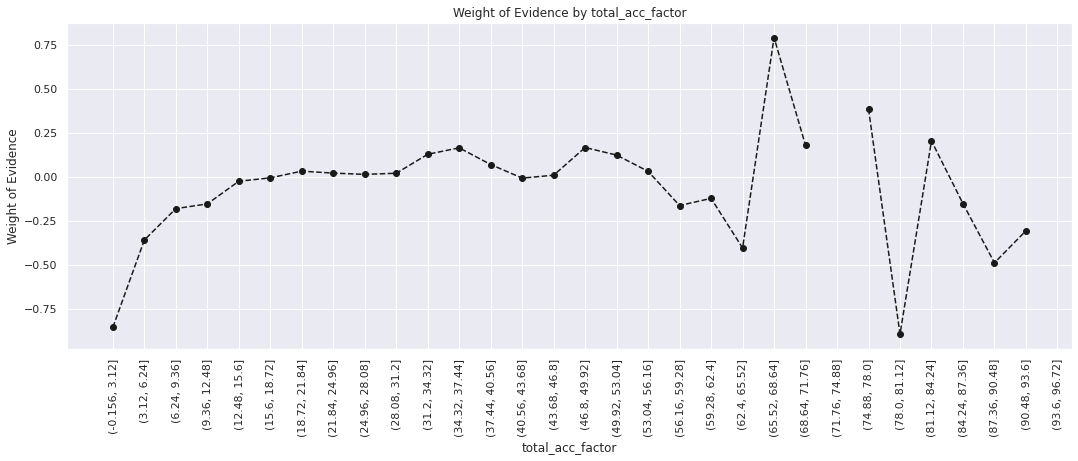

In [101]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [102]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [103]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

acc_now_delinq  n_obs  prop_good  ...  diff_prop_good  diff_WoE        IV
0             0.0  92871   0.890827  ...             NaN       NaN  0.000298
1             1.0    360   0.872222  ...        0.018605  0.178466  0.000298
2             2.0     22   0.818182  ...        0.054040  0.416674  0.000298
3             3.0      4   0.750000  ...        0.068182  0.405465  0.000298

[4 rows x 12 columns]

In [104]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [105]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [106]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_rev_hi_lim_factor  n_obs  ...  diff_WoE   IV
0          (-2013.133, 1006.566]    238  ...       NaN  inf
1           (1006.566, 2013.133]    678  ...  0.093184  inf
2             (2013.133, 3019.7]   1121  ...  0.189265  inf
3             (3019.7, 4026.266]   1461  ...  0.218360  inf
4           (4026.266, 5032.832]   2163  ...  0.093735  inf
...                          ...    ...  ...       ...  ...
1995  (2008100.168, 2009106.734]      0  ...       NaN  inf
1996  (2009106.734, 2010113.301]      0  ...       NaN  inf
1997  (2010113.301, 2011119.867]      0  ...       NaN  inf
1998  (2011119.867, 2012126.434]      0  ...       NaN  inf
1999    (2012126.434, 2013133.0]      1  ...       NaN  inf

[2000 rows x 12 columns]

In [107]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [108]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [109]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

installment_factor  n_obs  prop_good  ...  diff_prop_good  diff_WoE   IV
0      (14.369, 43.585]    485   0.872165  ...             NaN       NaN  inf
1       (43.585, 71.41]   1246   0.904494  ...        0.032329  0.327953  inf
2       (71.41, 99.235]   1731   0.895436  ...        0.009058  0.100678  inf
3      (99.235, 127.06]   2292   0.896597  ...        0.001161  0.012458  inf
4     (127.06, 154.885]   2602   0.886241  ...        0.010356  0.107061  inf
5     (154.885, 182.71]   4133   0.897653  ...        0.011412  0.118505  inf
6     (182.71, 210.535]   4109   0.905086  ...        0.007433  0.083648  inf
7     (210.535, 238.36]   3730   0.901877  ...        0.003210  0.036811  inf
8     (238.36, 266.185]   4660   0.899785  ...        0.002091  0.023410  inf
9     (266.185, 294.01]   4975   0.888844  ...        0.010941  0.115853  inf
10    (294.01, 321.835]   5186   0.906286  ...        0.017442  0.190120  inf
11    (321.835, 349.66]   6432   0.892568  ...        0.013718  0.151860  inf
12    (349.66, 377.485]   4758   0.881673  ...        0.010895  0.108880  inf
13    (377.485, 405.31]   4352   0.900276  ...        0.018603  0.191923  inf
14    (405.31, 433.135]   3429   0.882765  ...        0.017511  0.181417  inf
15    (433.135, 460.96]   3225   0.879380  ...        0.003385  0.032305  inf
16    (460.96, 488.785]   3865   0.894437  ...        0.015057  0.150319  inf
17    (488.785, 516.61]   3861   0.884227  ...        0.010210  0.103808  inf
18    (516.61, 544.435]   2730   0.868864  ...        0.015362  0.142126  inf
19    (544.435, 572.26]   2564   0.877535  ...        0.008671  0.078337  inf
20    (572.26, 600.085]   2434   0.873870  ...        0.003665  0.033672  inf
21    (600.085, 627.91]   2294   0.901918  ...        0.028048  0.283100  inf
22    (627.91, 655.735]   2091   0.901004  ...        0.000914  0.010287  inf
23    (655.735, 683.56]   2295   0.894989  ...        0.006015  0.065686  inf
24    (683.56, 711.385]   1650   0.876970  ...        0.018019  0.178706  inf
25    (711.385, 739.21]   1252   0.892173  ...        0.015203  0.149085  inf
26    (739.21, 767.035]   1360   0.897794  ...        0.005622  0.059825  inf
27    (767.035, 794.86]   1160   0.886207  ...        0.011587  0.120383  inf
28    (794.86, 822.685]   1023   0.888563  ...        0.002356  0.023578  inf
29    (822.685, 850.51]    967   0.885212  ...        0.003351  0.033406  inf
30    (850.51, 878.335]   1046   0.894837  ...        0.009625  0.098395  inf
31    (878.335, 906.16]    707   0.861386  ...        0.033451  0.314284  inf
32    (906.16, 933.985]    604   0.855960  ...        0.005426  0.044716  inf
33    (933.985, 961.81]    635   0.861417  ...        0.005457  0.044977  inf
34    (961.81, 989.635]    460   0.850000  ...        0.011417  0.092511  inf
35   (989.635, 1017.46]    441   0.854875  ...        0.004875  0.038761  inf
36  (1017.46, 1045.285]    305   0.875410  ...        0.020535  0.176300  inf
37  (1045.285, 1073.11]    206   0.878641  ...        0.003231  0.029959  inf
38  (1073.11, 1100.935]    228   0.894737  ...        0.016096  0.160445  inf
39  (1100.935, 1128.76]    247   0.931174  ...        0.036437  0.464800  inf
40  (1128.76, 1156.585]    227   0.916300  ...        0.014875  0.211767  inf
41  (1156.585, 1184.41]    287   0.895470  ...        0.020829  0.245220  inf
42  (1184.41, 1212.235]    308   0.905844  ...        0.010374  0.116037  inf
43  (1212.235, 1240.06]    284   0.901408  ...        0.004436  0.050943  inf
44  (1240.06, 1267.885]    159   0.861635  ...        0.039773  0.384034  inf
45  (1267.885, 1295.71]    132   0.833333  ...        0.028302  0.219501  inf
46  (1295.71, 1323.535]     47   0.787234  ...        0.046099  0.301105  inf
47  (1323.535, 1351.36]     21   0.714286  ...        0.072948  0.392042  inf
48  (1351.36, 1379.185]     15   0.733333  ...        0.019048  0.095310  inf
49  (1379.185, 1407.01]      7   1.000000  ...        0.266667       inf  inf

[50 rows x 12 columns]

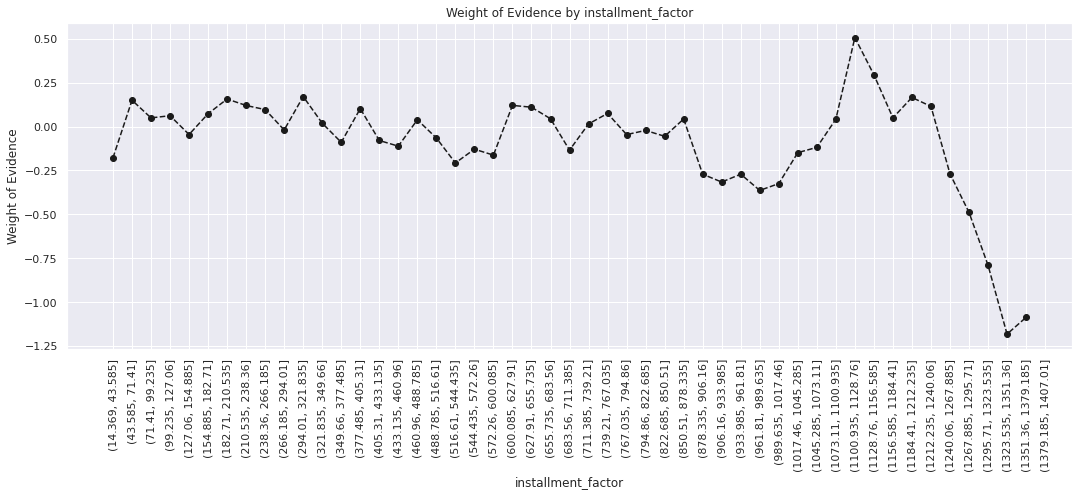

In [110]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### 13. Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [111]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor  n_obs  prop_good  ...  diff_prop_good  diff_WoE   IV
0      (-2695.2, 154704.0]  89203   0.889040  ...             NaN       NaN  inf
1     (154704.0, 304608.0]   3626   0.926641  ...        0.037601  0.455231  inf
2     (304608.0, 454512.0]    282   0.929078  ...        0.002437  0.036412  inf
3     (454512.0, 604416.0]     86   0.965116  ...        0.036038  0.747616  inf
4     (604416.0, 754320.0]     23   0.956522  ...        0.008595  0.229186  inf
5     (754320.0, 904224.0]     18   0.944444  ...        0.012077  0.257829  inf
6    (904224.0, 1054128.0]      7   1.000000  ...        0.055556       inf  inf
7   (1054128.0, 1204032.0]      6   1.000000  ...        0.000000       NaN  inf
8   (1204032.0, 1353936.0]      2   0.500000  ...        0.500000       inf  inf
9   (1353936.0, 1503840.0]      2   1.000000  ...        0.500000       inf  inf
10  (1503840.0, 1653744.0]      0        NaN  ...             NaN       NaN  inf
11  (1653744.0, 1803648.0]      0        NaN  ...             NaN       NaN  inf
12  (1803648.0, 1953552.0]      0        NaN  ...             NaN       NaN  inf
13  (1953552.0, 2103456.0]      0        NaN  ...             NaN       NaN  inf
14  (2103456.0, 2253360.0]      0        NaN  ...             NaN       NaN  inf
15  (2253360.0, 2403264.0]      0        NaN  ...             NaN       NaN  inf
16  (2403264.0, 2553168.0]      0        NaN  ...             NaN       NaN  inf
17  (2553168.0, 2703072.0]      0        NaN  ...             NaN       NaN  inf
18  (2703072.0, 2852976.0]      0        NaN  ...             NaN       NaN  inf
19  (2852976.0, 3002880.0]      0        NaN  ...             NaN       NaN  inf
20  (3002880.0, 3152784.0]      0        NaN  ...             NaN       NaN  inf
21  (3152784.0, 3302688.0]      0        NaN  ...             NaN       NaN  inf
22  (3302688.0, 3452592.0]      0        NaN  ...             NaN       NaN  inf
23  (3452592.0, 3602496.0]      0        NaN  ...             NaN       NaN  inf
24  (3602496.0, 3752400.0]      0        NaN  ...             NaN       NaN  inf
25  (3752400.0, 3902304.0]      0        NaN  ...             NaN       NaN  inf
26  (3902304.0, 4052208.0]      0        NaN  ...             NaN       NaN  inf
27  (4052208.0, 4202112.0]      0        NaN  ...             NaN       NaN  inf
28  (4202112.0, 4352016.0]      0        NaN  ...             NaN       NaN  inf
29  (4352016.0, 4501920.0]      0        NaN  ...             NaN       NaN  inf
30  (4501920.0, 4651824.0]      0        NaN  ...             NaN       NaN  inf
31  (4651824.0, 4801728.0]      0        NaN  ...             NaN       NaN  inf
32  (4801728.0, 4951632.0]      0        NaN  ...             NaN       NaN  inf
33  (4951632.0, 5101536.0]      0        NaN  ...             NaN       NaN  inf
34  (5101536.0, 5251440.0]      0        NaN  ...             NaN       NaN  inf
35  (5251440.0, 5401344.0]      0        NaN  ...             NaN       NaN  inf
36  (5401344.0, 5551248.0]      0        NaN  ...             NaN       NaN  inf
37  (5551248.0, 5701152.0]      0        NaN  ...             NaN       NaN  inf
38  (5701152.0, 5851056.0]      0        NaN  ...             NaN       NaN  inf
39  (5851056.0, 6000960.0]      0        NaN  ...             NaN       NaN  inf
40  (6000960.0, 6150864.0]      0        NaN  ...             NaN       NaN  inf
41  (6150864.0, 6300768.0]      0        NaN  ...             NaN       NaN  inf
42  (6300768.0, 6450672.0]      0        NaN  ...             NaN       NaN  inf
43  (6450672.0, 6600576.0]      0        NaN  ...             NaN       NaN  inf
44  (6600576.0, 6750480.0]      0        NaN  ...             NaN       NaN  inf
45  (6750480.0, 6900384.0]      0        NaN  ...             NaN       NaN  inf
46  (6900384.0, 7050288.0]      0        NaN  ...             NaN       NaN  inf
47  (7050288.0, 7200192.0]      0        NaN  ...             NaN       NaN  inf
48  (7200192.0, 7350096.0]      0       

In [112]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor  n_obs  prop_good  ...  diff_prop_good  diff_WoE   IV
0       (-2695.2, 79752.0]  62621   0.877932  ...             NaN       NaN  inf
1      (79752.0, 154704.0]  26582   0.915206  ...        0.037273  0.405928  inf
2     (154704.0, 229656.0]   2916   0.926269  ...        0.011063  0.151818  inf
3     (229656.0, 304608.0]    710   0.928169  ...        0.001900  0.028159  inf
4     (304608.0, 379560.0]    171   0.929825  ...        0.001656  0.025100  inf
..                     ...    ...        ...  ...             ...       ...  ...
95  (7125240.0, 7200192.0]      0        NaN  ...             NaN       NaN  inf
96  (7200192.0, 7275144.0]      0        NaN  ...             NaN       NaN  inf
97  (7275144.0, 7350096.0]      0        NaN  ...             NaN       NaN  inf
98  (7350096.0, 7425048.0]      0        NaN  ...             NaN       NaN  inf
99  (7425048.0, 7500000.0]      2   1.000000  ...             NaN       NaN  inf

[100 rows x 12 columns]

In [113]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [114]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


annual_inc_factor  n_obs  prop_good  ...  diff_prop_good  diff_WoE   IV
0       (4664.8, 7504.0]     10   1.000000  ...             NaN       NaN  inf
1      (7504.0, 10208.0]     84   0.761905  ...        0.238095       inf  inf
2     (10208.0, 12912.0]    123   0.780488  ...        0.018583  0.105361  inf
3     (12912.0, 15616.0]    304   0.851974  ...        0.071486  0.481654  inf
4     (15616.0, 18320.0]    383   0.827676  ...        0.024297  0.180919  inf
5     (18320.0, 21024.0]    733   0.840382  ...        0.012706  0.091826  inf
6     (21024.0, 23728.0]    704   0.846591  ...        0.006209  0.047036  inf
7     (23728.0, 26432.0]   1785   0.861064  ...        0.014474  0.116050  inf
8     (26432.0, 29136.0]   1355   0.853137  ...        0.007928  0.064743  inf
9     (29136.0, 31840.0]   2292   0.854276  ...        0.001139  0.009122  inf
10    (31840.0, 34544.0]   2130   0.855399  ...        0.001123  0.009052  inf
11    (34544.0, 37248.0]   3525   0.853050  ...        0.002349  0.018867  inf
12    (37248.0, 39952.0]   1926   0.880582  ...        0.027532  0.239226  inf
13    (39952.0, 42656.0]   4973   0.867484  ...        0.013097  0.119051  inf
14    (42656.0, 45360.0]   4038   0.875929  ...        0.008444  0.075531  inf
15    (45360.0, 48064.0]   3015   0.880597  ...        0.004668  0.043668  inf
16    (48064.0, 50768.0]   4397   0.878326  ...        0.002271  0.021422  inf
17    (50768.0, 53472.0]   2898   0.885783  ...        0.007457  0.071701  inf
18    (53472.0, 56176.0]   4143   0.873280  ...        0.012503  0.118096  inf
19    (56176.0, 58880.0]   1810   0.883425  ...        0.010145  0.094997  inf
20    (58880.0, 61584.0]   4726   0.881083  ...        0.002342  0.022546  inf
21    (61584.0, 64288.0]   2246   0.895815  ...        0.014731  0.148834  inf
22    (64288.0, 66992.0]   3455   0.895803  ...        0.000012  0.000124  inf
23    (66992.0, 69696.0]   1965   0.907379  ...        0.011576  0.130607  inf
24    (69696.0, 72400.0]   4096   0.899902  ...        0.007477  0.085906  inf
25    (72400.0, 75104.0]   3495   0.897854  ...        0.002048  0.022535  inf
26    (75104.0, 77808.0]    967   0.915202  ...        0.017348  0.205263  inf
27    (77808.0, 80512.0]   3571   0.901988  ...        0.013213  0.159354  inf
28    (80512.0, 83216.0]   1319   0.924185  ...        0.022197  0.281102  inf
29    (83216.0, 85920.0]   2274   0.899736  ...        0.024449  0.306320  inf
30    (85920.0, 88624.0]   1144   0.905594  ...        0.005858  0.066695  inf
31    (88624.0, 91328.0]   2425   0.924536  ...        0.018942  0.244646  inf
32    (91328.0, 94032.0]   1141   0.911481  ...        0.013055  0.173782  inf
33    (94032.0, 96736.0]   1562   0.913572  ...        0.002091  0.026199  inf
34    (96736.0, 99440.0]    916   0.918122  ...        0.004550  0.059049  inf
35   (99440.0, 102144.0]   2307   0.902904  ...        0.015218  0.187185  inf
36  (102144.0, 104848.0]    552   0.898551  ...        0.004353  0.048694  inf
37  (104848.0, 107552.0]   1094   0.932358  ...        0.033808  0.442269  inf
38  (107552.0, 110256.0]   1562   0.915493  ...        0.016865  0.240865  inf
39  (110256.0, 112960.0]    295   0.908475  ...        0.007018  0.087478  inf
40  (112960.0, 115664.0]    790   0.911392  ...        0.002918  0.035606  inf
41  (115664.0, 118368.0]    358   0.935754  ...        0.024362  0.347880  inf
42  (118368.0, 121072.0]   1473   0.918534  ...        0.017221  0.256048  inf
43  (121072.0, 123776.0]    204   0.936275  ...        0.017741  0.264736  inf
44  (123776.0, 126480.0]    870   0.928736  ...        0.007539  0.119896  inf
45  (126480.0, 129184.0]    239   0.933054  ...        0.004319  0.067155  inf
46  (129184.0, 131888.0]    734   0.927793  ...        0.005261  0.081313  inf
47  (131888.0, 134592.0]    207   0.932367  ...        0.004574  0.070362  inf
48  (134592.0, 137296.0]    449   0.915367  ...        0.017000  0.242626  inf
49  (137296.0, 140000.0]    627   0.909091  ...        0.

In [115]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [116]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [117]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


mths_since_last_delinq_factor  n_obs  ...  diff_WoE   IV
0                   (-0.17, 3.4]   1348  ...       NaN  inf
1                     (3.4, 6.8]   1890  ...  0.106981  inf
2                    (6.8, 10.2]   3373  ...  0.064453  inf
3                   (10.2, 13.6]   2496  ...  0.090864  inf
4                   (13.6, 17.0]   3165  ...  0.120464  inf
5                   (17.0, 20.4]   2282  ...  0.091258  inf
6                   (20.4, 23.8]   2115  ...  0.056415  inf
7                   (23.8, 27.2]   2755  ...  0.031174  inf
8                   (27.2, 30.6]   1929  ...  0.009183  inf
9                   (30.6, 34.0]   2453  ...  0.045968  inf
10                  (34.0, 37.4]   1786  ...  0.134413  inf
11                  (37.4, 40.8]   1765  ...  0.176775  inf
12                  (40.8, 44.2]   2270  ...  0.111619  inf
13                  (44.2, 47.6]   1664  ...  0.229554  inf
14                  (47.6, 51.0]   1739  ...  0.111665  inf
15                  (51.0, 54.4]   1158  ...  0.007085  inf
16                  (54.4, 57.8]   1130  ...  0.264308  inf
17                  (57.8, 61.2]   1423  ...  0.178655  inf
18                  (61.2, 64.6]   1015  ...  0.086182  inf
19                  (64.6, 68.0]   1342  ...  0.043533  inf
20                  (68.0, 71.4]    930  ...  0.070713  inf
21                  (71.4, 74.8]    928  ...  0.040527  inf
22                  (74.8, 78.2]   1195  ...  0.208201  inf
23                  (78.2, 81.6]    768  ...  0.294450  inf
24                  (81.6, 85.0]    136  ...  0.170559  inf
25                  (85.0, 88.4]     10  ...       inf  inf
26                  (88.4, 91.8]      1  ...       NaN  inf
27                  (91.8, 95.2]      2  ...       NaN  inf
28                  (95.2, 98.6]      3  ...       inf  inf
29                 (98.6, 102.0]      4  ...       inf  inf
30                (102.0, 105.4]      2  ...       NaN  inf
31                (105.4, 108.8]      3  ...       NaN  inf
32                (108.8, 112.2]      1  ...       NaN  inf
33                (112.2, 115.6]      1  ...       NaN  inf
34                (115.6, 119.0]      2  ...       NaN  inf
35                (119.0, 122.4]      2  ...       NaN  inf
36                (122.4, 125.8]      1  ...       NaN  inf
37                (125.8, 129.2]      0  ...       NaN  inf
38                (129.2, 132.6]      1  ...       NaN  inf
39                (132.6, 136.0]      1  ...       NaN  inf
40                (136.0, 139.4]      0  ...       NaN  inf
41                (139.4, 142.8]      0  ...       NaN  inf
42                (142.8, 146.2]      1  ...       NaN  inf
43                (146.2, 149.6]      0  ...       NaN  inf
44                (149.6, 153.0]      0  ...       NaN  inf
45                (153.0, 156.4]      0  ...       NaN  inf
46                (156.4, 159.8]      0  ...       NaN  inf
47                (159.8, 163.2]      0  ...       NaN  inf
48                (163.2, 166.6]      0  ...       NaN  inf
49                (166.6, 170.0]      1  ...       NaN  inf

[50 rows x 12 columns]

In [118]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [119]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### 14. Preprocessing Continuous Variables: Creating Dummy Variables

In [120]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

dti_factor  n_obs  prop_good  ...  diff_prop_good  diff_WoE        IV
0      (-0.04, 0.4]    187   0.893048  ...             NaN       NaN  0.038146
1        (0.4, 0.8]    184   0.880435  ...        0.012613  0.125708  0.038146
2        (0.8, 1.2]    223   0.892377  ...        0.011942  0.118697  0.038146
3        (1.2, 1.6]    255   0.905882  ...        0.013506  0.149113  0.038146
4        (1.6, 2.0]    315   0.892063  ...        0.013819  0.152370  0.038146
..              ...    ...        ...  ...             ...       ...       ...
95  (37.991, 38.39]     54   0.888889  ...        0.044444  0.387766  0.038146
96   (38.39, 38.79]     37   0.837838  ...        0.051051  0.437214  0.038146
97   (38.79, 39.19]     45   0.844444  ...        0.006607  0.049448  0.038146
98   (39.19, 39.59]     44   0.931818  ...        0.087374  0.923284  0.038146
99   (39.59, 39.99]     57   0.859649  ...        0.072169  0.802581  0.038146

[100 rows x 12 columns]

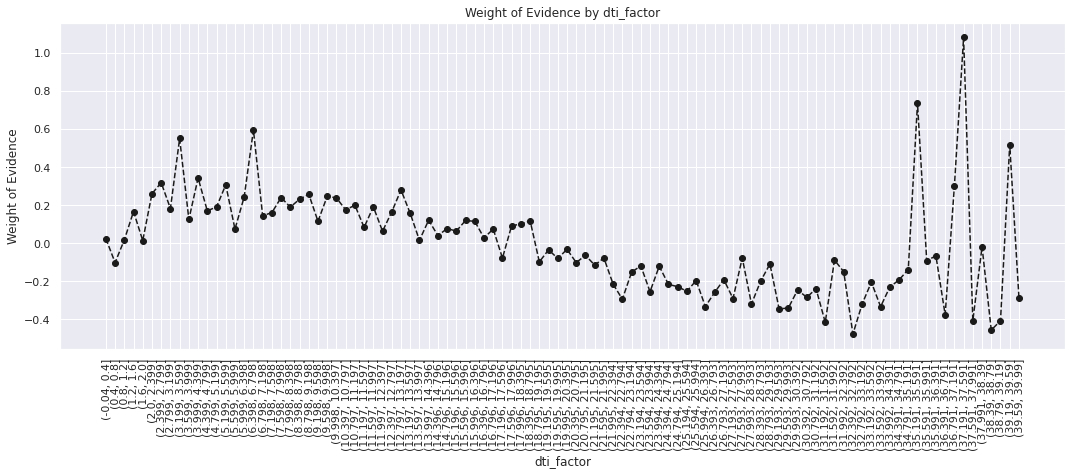

In [121]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [122]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [123]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dti_factor  n_obs  prop_good  ...  diff_prop_good  diff_WoE        IV
0   (-0.035, 0.7]    328   0.884146  ...             NaN       NaN  0.033919
1      (0.7, 1.4]    393   0.903308  ...        0.019162  0.202237  0.033919
2      (1.4, 2.1]    536   0.895522  ...        0.007785  0.086097  0.033919
3      (2.1, 2.8]    607   0.915980  ...        0.020458  0.240508  0.033919
4      (2.8, 3.5]    811   0.924784  ...        0.008804  0.120257  0.033919
5      (3.5, 4.2]    970   0.903093  ...        0.021691  0.277128  0.033919
6      (4.2, 4.9]   1140   0.913158  ...        0.010065  0.120746  0.033919
7      (4.9, 5.6]   1370   0.911679  ...        0.001479  0.018509  0.033919
8      (5.6, 6.3]   1491   0.904762  ...        0.006917  0.083016  0.033919
9      (6.3, 7.0]   1722   0.926829  ...        0.022067  0.287682  0.033919
10     (7.0, 7.7]   1846   0.904117  ...        0.022712  0.295144  0.033919
11     (7.7, 8.4]   2044   0.909491  ...        0.005374  0.063608  0.033919
12     (8.4, 9.1]   2097   0.910348  ...        0.000857  0.010455  0.033919
13     (9.1, 9.8]   2319   0.908150  ...        0.002198  0.026639  0.033919
14    (9.8, 10.5]   2519   0.909885  ...        0.001735  0.020977  0.033919
15   (10.5, 11.2]   2694   0.908315  ...        0.001570  0.019000  0.033919
16   (11.2, 11.9]   2748   0.901747  ...        0.006568  0.076445  0.033919
17   (11.9, 12.6]   2844   0.903657  ...        0.001910  0.021748  0.033919
18   (12.6, 13.3]   2886   0.908870  ...        0.005214  0.061387  0.033919
19   (13.3, 14.0]   3056   0.898233  ...        0.010637  0.122177  0.033919
20   (14.0, 14.7]   3068   0.898305  ...        0.000072  0.000789  0.033919
21   (14.7, 15.4]   2954   0.898104  ...        0.000201  0.002196  0.033919
22   (15.4, 16.1]   3050   0.900656  ...        0.002551  0.028196  0.033919
23   (16.1, 16.8]   2914   0.896019  ...        0.004637  0.050776  0.033919
24   (16.8, 17.5]   3078   0.886940  ...        0.009080  0.093901  0.033919
25   (17.5, 18.2]   2964   0.903171  ...        0.016232  0.173115  0.033919
26   (18.2, 18.9]   2863   0.894167  ...        0.009004  0.098940  0.033919
27   (18.9, 19.6]   2796   0.887339  ...        0.006828  0.070185  0.033919
28   (19.6, 20.3]   2772   0.887807  ...        0.000468  0.004686  0.033919
29   (20.3, 21.0]   2830   0.879505  ...        0.008301  0.080776  0.033919
30   (21.0, 21.7]   2517   0.883989  ...        0.004484  0.043005  0.033919
31   (21.7, 22.4]   2495   0.870541  ...        0.013448  0.125007  0.033919
32   (22.4, 23.1]   2261   0.865989  ...        0.004553  0.039805  0.033919
33   (23.1, 23.8]   2327   0.876235  ...        0.010247  0.091308  0.033919
34   (23.8, 24.5]   2127   0.870710  ...        0.005526  0.050004  0.033919
35   (24.5, 25.2]   1929   0.867807  ...        0.002903  0.025543  0.033919
36   (25.2, 25.9]   1707   0.865847  ...        0.001961  0.016985  0.033919
37   (25.9, 26.6]   1657   0.858177  ...        0.007669  0.064489  0.033919
38   (26.6, 27.3]   1553   0.867354  ...        0.009176  0.077525  0.033919
39   (27.3, 28.0]   1559   0.873637  ...        0.006283  0.055747  0.033919
40   (28.0, 28.7]   1390   0.861871  ...        0.011766  0.102592  0.033919
41   (28.7, 29.4]   1341   0.869500  ...        0.007630  0.065635  0.033919
42   (29.4, 30.1]   1147   0.851787  ...        0.017713  0.147860  0.033919
43   (30.1, 30.8]    838   0.862768  ...        0.010981  0.089789  0.033919
44   (30.8, 31.5]    798   0.859649  ...        0.003119  0.026098  0.033919
45   (31.5, 32.2]    734   0.877384  ...        0.017735  0.155510  0.033919
46   (32.2, 32.9]    696   0.849138  ...        0.028246  0.240033  0.033919
47   (32.9, 33.6]    621   0.856683  ...        0.007545  0.060151  0.033919
48   (33.6, 34.3]    634   0.859621  ...        0.002939  0.024142  0.033919
49   (34.3, 35.0]    507   0.867850  ...        0.008229  0.069933  0.033919

[50 rows x 12 columns]

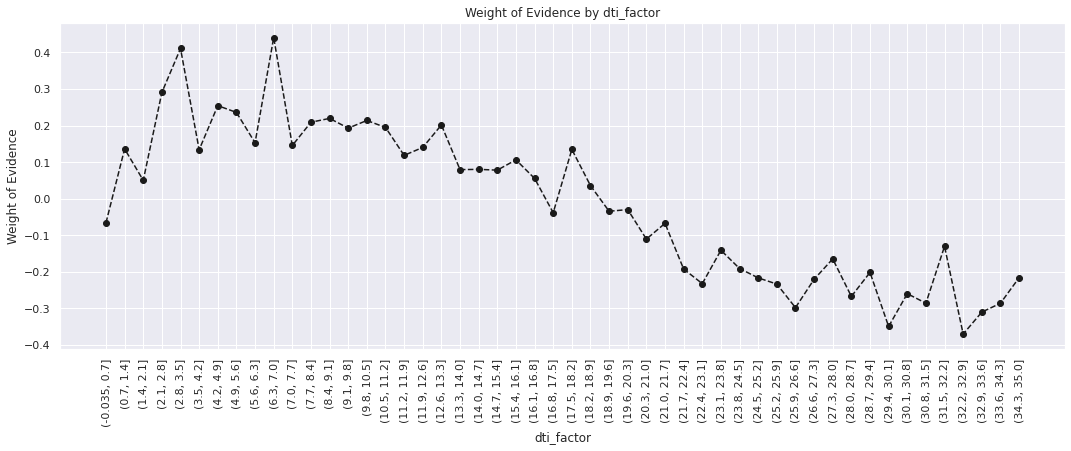

In [124]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [125]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [126]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
# sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mths_since_last_record_factor  n_obs  ...  diff_WoE   IV
0                 (-0.129, 2.58]    244  ...       NaN  inf
1                   (2.58, 5.16]     36  ...  1.024079  inf
2                   (5.16, 7.74]     39  ...  0.405465  inf
3                  (7.74, 10.32]     66  ...  0.255933  inf
4                  (10.32, 12.9]     42  ...  1.131402  inf
5                  (12.9, 15.48]     69  ...  0.287682  inf
6                 (15.48, 18.06]     95  ...  0.055350  inf
7                 (18.06, 20.64]     58  ...  1.490435  inf
8                 (20.64, 23.22]    101  ...  1.230290  inf
9                  (23.22, 25.8]     94  ...  0.777284  inf
10                 (25.8, 28.38]    135  ...  0.722465  inf
11                (28.38, 30.96]    103  ...  0.317702  inf
12                (30.96, 33.54]    196  ...  0.016011  inf
13                (33.54, 36.12]    195  ...  0.204669  inf
14                 (36.12, 38.7]    166  ...  0.023452  inf
15                 (38.7, 41.28]    234  ...  0.043686  inf
16                (41.28, 43.86]    194  ...  0.102221  inf
17                (43.86, 46.44]    328  ...  0.247950  inf
18                (46.44, 49.02]    367  ...  0.044477  inf
19                 (49.02, 51.6]    231  ...  0.363796  inf
20                 (51.6, 54.18]    447  ...  0.290187  inf
21                (54.18, 56.76]    264  ...  0.357135  inf
22                (56.76, 59.34]    393  ...  0.395470  inf
23                (59.34, 61.92]    287  ...  0.261269  inf
24                 (61.92, 64.5]    405  ...  0.149419  inf
25                 (64.5, 67.08]    394  ...  0.773643  inf
26                (67.08, 69.66]    272  ...  1.103720  inf
27                (69.66, 72.24]    366  ...  0.219639  inf
28                (72.24, 74.82]    231  ...  0.125515  inf
29                 (74.82, 77.4]    350  ...  0.028573  inf
30                 (77.4, 79.98]    228  ...  0.205513  inf
31                (79.98, 82.56]    355  ...  0.085700  inf
32                (82.56, 85.14]    288  ...  0.246762  inf
33                (85.14, 87.72]    251  ...  0.903527  inf
34                 (87.72, 90.3]    345  ...  0.594893  inf
35                 (90.3, 92.88]    249  ...  0.405716  inf
36                (92.88, 95.46]    385  ...  0.151297  inf
37                (95.46, 98.04]    401  ...  0.136968  inf
38               (98.04, 100.62]    327  ...  0.056991  inf
39               (100.62, 103.2]    526  ...  0.116344  inf
40               (103.2, 105.78]    396  ...  0.074104  inf
41              (105.78, 108.36]    565  ...  0.047545  inf
42              (108.36, 110.94]    407  ...  0.274960  inf
43              (110.94, 113.52]    524  ...  0.305830  inf
44               (113.52, 116.1]    515  ...  0.271468  inf
45               (116.1, 118.68]    314  ...  0.285221  inf
46              (118.68, 121.26]     92  ...  0.295448  inf
47              (121.26, 123.84]      0  ...       NaN  inf
48              (123.84, 126.42]      0  ...       NaN  inf
49               (126.42, 129.0]      1  ...       NaN  inf

[50 rows x 12 columns]

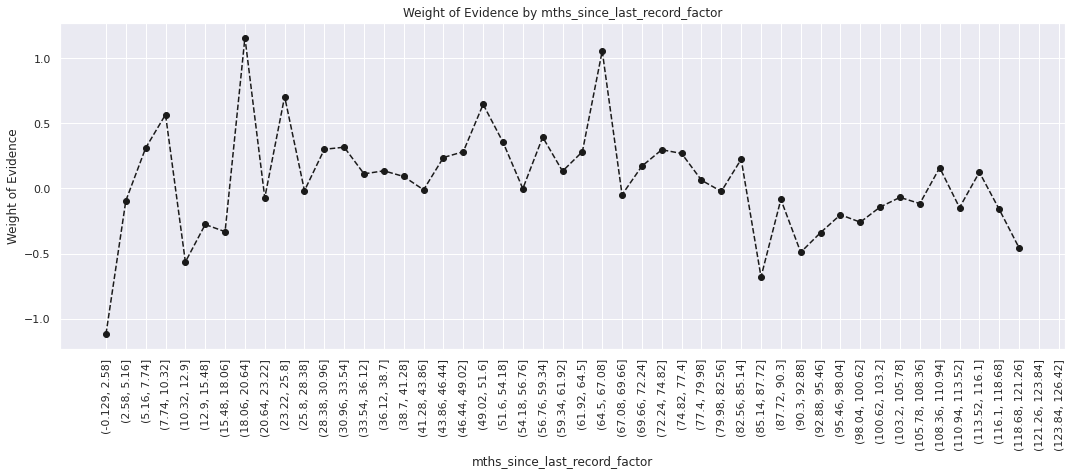

In [127]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [128]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

### 15. Preprocessing the Test Dataset

In [129]:
#####
#loan_data_inputs_train = df_inputs_prepr
#####
loan_data_inputs_test = df_inputs_prepr

In [130]:
from google.colab import files
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
files.download('loan_data_inputs_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>